https://sejaumdatascientist.com/como-criar-um-programa-de-fidelidade-para-empresa/

# Cicle

### Cicle 01
- Foundout 3 potencial clusters using the data as it is.

Next cicles:
- Need to make some feature engineering
- Deal with NA values
- Run others clustering algorithms

### Cicle 02
- Data is still messy. Got a similar cluster as cicle 01.
- Dealt with NA values
- Have runned other clustering algorithms to find a optimal cluster

Next cicles:
- Need to make some feature engineering

### Cicle 03
- Created 3 clusters and the average gross revenue adjusted seems to be more acurate then the previous circle.
- The data have been separeted in "good return", "qtd adjustment", "free purchase" and "normal purchase". It was possible to identify strange information in the data and it was treated creating new features.

Next cicles:
- Futher investigation on description / stock_code to "break" the hude cluster
- Data of purchase need to be analyzed to create new features
- The last cicles indicated some anomaly with customer with 0 or negative total purchase adjusted. Since we are not interested in this behaviour, we are going to remove it.

### Cicle 04
- This cicles we explored the "describe" columns with several features counting the frequency of each word.
- It was possible to create a cluster with most of people spending in avg $157.460,93 with 6 customers. But it didn´t capture the most speding customers, because there are a few in other clusters.

Next cicles:
- Data of purchase need to be analyzed to create new features
- Make a analyzis on the space using PCA or UMAP.

### Cicle 05
- "Date" feature has been developed creating new features.

Next cicles:
- Make a analyzis on the space using PCA or UMAP.

### Cicle 06
- Before making analyzis with PCA or UMAP, it was given another analyzies with "description" feature, since the counting frequency didn´t clustered similar words.
- It was taken 4 approuches, where it was choosen the one TDIF VECTORIZER + KMEANS CLUSTERING

Next cicles:
- Make a analyzis on the space using PCA or UMAP.

### Cicle 07
- After using PCA, UMAP, t-SNES and tree based embdeding, the last choice had a better performance since the we put the target value to reduce the number of features.
- Clustering the 'description' feature it doesn´t seem to be effective.
- However, both clustering (cicle 6 and 7) elect customers with a long stay period and it is necessary to view if this customers are currently buying creating new features.

Next cicles:
- Make new features to make the clusters better to predict "insiders".

### Cicle 08
- There were some tries expanding the purchases by month (total of invoices and revenue).
- NLP features were eliminated to see with only this features would be enough.
- The result was not better compared to cicle

Next cicles:
- Make new features to make the clusters better to predict "insiders".

# 0.0. Planejamento da Solução ( IOT )

## Input - Entrada

### O problema de negócio

1. Selecionar os mais valiosos clientes para formar o programa de fidelidade **"INSIDERS"**
2. Conjunto de dados com as vendas de produtos durante 1 ano ( Nov 2015 to Dec 2017 )

## Output - Saída

1. A indicação de pessoas para fazer parte do programa de fidelidade **"INSIDERS"**.
2. Relatório com as respostas para as seguintes perguntas:
    - Quem são as pessoas elegíveis para participar do programa de Insiders ?
    - Quantos clientes farão parte do grupo?
    - Quais as principais características desses clientes ?
    - Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    - Qual a expectativa de faturamento desse grupo para os próximos meses ?
    - Quais as condições para uma pessoa ser elegível ao Insiders ?
    - Quais as condições para uma pessoa ser removida do Insiders ?
    - Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Quais ações o time de marketing pode realizar para aumentar o faturamento?

## Tasks - Processo

1. **Quem são as pessoas elegíveis para participar do programa de Insiders ?**
    - O que é ser elegível ? O que é um cliente "valioso" para a empresa ?
        - Faturamento:
            - **Alto Ticket Médio**
                + média dos preços pagos
            - **Alto LTV (life time value)**
                + quanto foi gasto na empresa
            - **Baixa Recência ou Alta Frequência**
                + tempo entre as compras - contado em dias
            - **Alto Basket Size**
                + quantidade média de produtos comprados
            - **Baixa probabilidade de Churn**
                + encerramento de contrato ou baixa da relação com a empresa
            - **Previsão alta de LTV**
            - **Alta propensão de compra**

        - Custo:
            - Baixo número de devoluções

        - Experiência:  
            - Média alta de avaliações
            
            
2. **Quantos clientes farão parte do grupo?**
    - Número de clientes
    - % em relação ao total de clients
    
    
3. **Quais as principais características desses clientes ?**
    - Escrever os principais atributos dos clientes
        - Idade
        - País / Localização
        - Salário
        
    - Escrever os principais comportamentos de compra dos clients ( métricas de negócio )
        - Atributos da clusterização / Vide acima
    
    
4. **Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?**
    - Calcular o faturamento total da empresa durante o ano.
    - Calcular o faturamento (%) apenas do cluster Insiders.
    
    
5. **Qual a expectativa de faturamento desse grupo para os próximos meses ?**
    - Cálculo do LTV do grupo Insiders
    - Análise de Cohort (marcação do grupo e seu comportamento ao longo do tempo)
    - Séries Temporais ( ARMA, ARIMA, HoltWinter, etc )
    

6. **Quais as condições para uma pessoa ser elegível ao Insiders ?**
    - Qual o período de avaliação ? (1 mês, 3 meses...?)
    - O "desempenho" do cliente está próximo da média do cluster Insiders. 
    
    
7. **Quais as condições para uma pessoa ser removida do Insiders ?**
    - O "desempenho" do cliente não está mais próximo da média do cluster Insiders. 
    
    
8. **Qual a garantia que o programa Insiders é melhor que o restante da base ?**
    - Teste de Hipóteses
    - Teste A/B
    
    
9. **Quais ações o time de marketing pode realizar para aumentar o faturamento?**
    - Descontos
    - Preferências de escolha
    - Produtos exclusivos

# 0.0. Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import inflection
import sklearn
import yellowbrick
import umap.umap_ as umap
from datetime import datetime as dtime
from matplotlib import pyplot as plt
from IPython.display import Image

from pandas_profiling import ProfileReport

import nltk
from nltk.tokenize import RegexpTokenizer

from IPython.core.display import HTML
from sklearn import cluster as c
from sklearn import metrics as m
from sklearn import preprocessing as pp
from sklearn import decomposition as dd
from sklearn import manifold      as mn
from sklearn import mixture       as mx
from sklearn import ensemble      as en
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from plotly import express as px

## 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'ggplot')
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

def describe_num(num_attributes):
    a = num_attributes.describe().T.reset_index()
    
    d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew())).T      
    d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis())).T
    d7 = pd.DataFrame(num_attributes.apply( lambda x: x.unique().shape[0])).T
    
    n = pd.concat([d4, d5, d6, d7], axis=0).T.reset_index()
    n.columns = ['attibutes', 'range', 'skew', 'kurtosis', 'unique']
    b = a.merge(n, right_on='attibutes', left_on='index')
    b.drop('index', axis=1, inplace=True)
    columns = ['attibutes', 'count', 'mean', 'std', '25%', '50%', '75%', 'min', 'max', 'range',
           'skew', 'kurtosis', 'unique']
    return b[columns]

pd.options.display.float_format = '{:.2f}'.format

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Funtions for deploy

def data_description(data):
    df1 = data.copy()
    # storing columns names
    cols_old = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
    
    # transforming to underscore the names and put into lowcase
    snakecase = lambda x: inflection.underscore( x )
    
    # creating a list with a new snakecase columns name and indicating the new one
    cols_new = list( map( snakecase, cols_old ) )
    
    #renaming columns name
    df1.columns = cols_new
    
    #changing data type - invoice_date
    df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')
    
    # describe - NA
    # replace with existing description by stock_code
    df1aux = df1[~df1['description'].isna()]
    aux3 = df1aux[['stock_code', 'description']].drop_duplicates('stock_code')
    df1 = df1.drop(columns='description')
    df1_ = pd.merge(df1, aux3, how='left', on='stock_code')
    df1_.isna().sum()
    # the remaing 112 records have 0 values for unit_price. it is going to bel erased
    df1_ = df1_.dropna(subset=['description'])
    df1 = df1_.copy()

    # customer id - NA
    aux_na = df1[df1['customer_id'].isna()].copy()
    aux_na['gross_revenue_na'] = aux_na['unit_price']*aux_na['quantity']
    aux = df1[~df1['customer_id'].isna()].copy()
    aux['gross_revenue_na'] = aux['unit_price']*aux['quantity']
    df1_ = df1.copy()
    # create reference - artificial customer to not drop the records
    df_backup = pd.DataFrame( aux_na['invoice_no'].drop_duplicates() )
    df_backup['customer_id'] = np.arange( 30000, 30000+len( df_backup ), 1) 
    # merge original with reference dataframe
    df1_ = pd.merge( df1_, df_backup, on='invoice_no', how='left' )
    # coalesce (command from SQL)
    df1_['customer_id'] = df1_['customer_id_x'].combine_first( df1_['customer_id_y'] )
    # drop extra columns
    df1_ = df1_.drop( columns=['customer_id_x', 'customer_id_y'], axis=1 )
    df1 = df1_.copy()
    
    # changing types
    df1['customer_id'] = df1['customer_id'].astype('int32')
    df1['quantity'] = df1['quantity'].astype('int32')
    return df1

def feature_eng(df1):
    df2 = df1.copy()
    ### 2.1. GROSS REVENUE
    df2['gross_revenue'] = df2['unit_price'] * df2['quantity']
    ### 2.2. GOOD RETURN
    df2['good_return'] = df2.apply(lambda x: 1 if (x['quantity'] < 0) & (x['unit_price'] > 0) else 0, axis=1)
    ### 2.3. QNTD ADJUSTMENT
    df2['qtd_adjustment'] = df2.apply(lambda x: 1 if (x['quantity'] < 0) & (x['unit_price'] == 0) else 0, axis=1)
    ### 2.4. FREE PURCHASE
    df2['free_purchase'] = df2.apply(lambda x: 1 if (x['quantity'] > 0) & (x['unit_price'] == 0) else 0, axis=1)
    ### 2.5. NORMAL PURCHASE
    df2['normal_purchase'] = df2.apply(lambda x: 1 if (x['quantity'] > 0) & (x['unit_price'] > 0) else 0, axis=1)
    return df2

def feature_filtering(df2):
    df3 = df2.copy()
    ## 3.1. Row Filtering
    # Qntd Adjustment - There is no reason to maintain this records in the data.
    df3 = df3[df3['qtd_adjustment'] == 0]
    ## 3.2. Column Filtering
    df3 = df3.drop(columns=['qtd_adjustment'])
    return df3

## 0.2. Load dataset

In [4]:
# load data
df_raw = pd.read_csv('../data/raw/Ecommerce.csv',encoding='unicode_escape')

# drop extra columns
df_raw.drop('Unnamed: 8', axis=1, inplace=True)

# <font color='red'> 1.0. Descrição dos dados </font>

In [5]:
df1 = df_raw.copy()
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.00,United Kingdom


## 1.1. Rename columuns

In [6]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
# storing columns names
cols_old = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country']

# transforming to underscore the names and put into lowcase
snakecase = lambda x: inflection.underscore( x )

# creating a list with a new snakecase columns name and indicating the new one
cols_new = list( map( snakecase, cols_old ) )

#renaming columns name
df1.columns = cols_new

## 1.2. Data dimensions

In [8]:
df1.shape

(541909, 8)

## 1.3. Data types

In [9]:
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id            float64
country                 object
dtype: object

## 1.4. Check NA

In [10]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5. Replace NA

### 1.5.1 Description

In [11]:
# replace with existing description by stock_code
df1aux = df1[~df1['description'].isna()]
aux3 = df1aux[['stock_code', 'description']].drop_duplicates('stock_code')
df1 = df1.drop(columns='description')
df1_ = pd.merge(df1, aux3, how='left', on='stock_code')
df1_.isna().sum()

invoice_no           0
stock_code           0
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
description        112
dtype: int64

In [12]:
# the remaing 112 records have 0 values for unit_price. it is going to bel erased
df1_ = df1_.dropna(subset=['description'])

df1 = df1_.copy()

df1_.isna().sum()

invoice_no           0
stock_code           0
quantity             0
invoice_date         0
unit_price           0
customer_id     134968
country              0
description          0
dtype: int64

### 1.5.2 Customer ID 

In [13]:
df1['customer_id'].isna().sum()/df1.shape[0]

0.24911175218762746

In [14]:
aux_na = df1[df1['customer_id'].isna()].copy()
aux_na['gross_revenue_na'] = aux_na['unit_price']*aux_na['quantity']
print("Total Gross Revenue NA $ %.2f" % aux_na['gross_revenue_na'].sum())
aux = df1[~df1['customer_id'].isna()].copy()
aux['gross_revenue_na'] = aux['unit_price']*aux['quantity']
print("Total Gross Revenue $ %.2f" % aux['gross_revenue_na'].sum())
print("Percentage of Total (not NA): %.2f" % (aux_na['gross_revenue_na'].sum()/aux['gross_revenue_na'].sum()*100), '%')

Total Gross Revenue NA $ 1447682.12
Total Gross Revenue $ 8300065.81
Percentage of Total (not NA): 17.44 %


In [15]:
df1_ = df1.copy()
df1_.shape

(541797, 8)

In [16]:
# create reference - artificial customer to not drop the records
df_backup = pd.DataFrame( aux_na['invoice_no'].drop_duplicates() )
df_backup['customer_id'] = np.arange( 30000, 30000+len( df_backup ), 1) 

# merge original with reference dataframe
df1_ = pd.merge( df1_, df_backup, on='invoice_no', how='left' )

# coalesce (command from SQL)
df1_['customer_id'] = df1_['customer_id_x'].combine_first( df1_['customer_id_y'] )

# drop extra columns
df1_ = df1_.drop( columns=['customer_id_x', 'customer_id_y'], axis=1 )

In [17]:
df1 = df1_.copy()
df1_.isna().sum()

invoice_no      0
stock_code      0
quantity        0
invoice_date    0
unit_price      0
country         0
description     0
customer_id     0
dtype: int64

## 1.6. Change dtypes

In [18]:
# customer_id
df1['customer_id'] = df1['customer_id'].astype('int32')
df1['quantity'] = df1['quantity'].astype('int32')
df1.dtypes

invoice_no              object
stock_code              object
quantity                 int32
invoice_date    datetime64[ns]
unit_price             float64
country                 object
description             object
customer_id              int32
dtype: object

## 1.7. Descriptive Statistics

In [19]:
num_attributes = df1.select_dtypes(include=['int32', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int32', 'float64', 'datetime64[ns]'])

### 1.7.1. Numerical Attibutes

In [20]:
describe_num(num_attributes)

,attibutes,count,mean,std,25%,50%,75%,min,max,range,skew,kurtosis,unique
0,quantity,541797.00,9.56,218.10,1.00,3.00,10.00,-80995.00,80995.00,161990.00,-0.26,119745.00,722.00
1,unit_price,541797.00,4.61,96.77,1.25,2.08,4.13,-11062.06,38970.00,50032.06,186.49,58993.57,1630.00
2,customer_id,541797.00,19408.83,7330.50,14367.00,16245.00,18283.00,12346.00,33597.00,21251.00,1.04,-0.68,7970.00


**quantity** - There is some strange values in the max and min values. Need further investigation

**unit_price** - There is some product with price equals 0 and a max values of 38.970. Need further investigation

### 1.7.2. Categorical Attibutes

In [21]:
cat_attributes.apply( lambda x: x.unique().shape[0])

invoice_no     25788
stock_code      3958
country           38
description     3817
dtype: int64

# <font color='red'> 2.0. Feature Engineering </font>

In [35]:
df2 = data_description(df_raw)
#df2 = df1.copy()
df2.columns

Index(['invoice_no', 'stock_code', 'quantity', 'invoice_date', 'unit_price',
       'country', 'description', 'customer_id'],
      dtype='object')

In [36]:
df2.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,description,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,17850
1,536365,71053,6,2016-11-29,3.39,United Kingdom,WHITE METAL LANTERN,17850
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,CREAM CUPID HEARTS COAT HANGER,17850
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,17850
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,17850


### 2.1. GROSS REVENUE

In [24]:
# gross revenue
df2['gross_revenue'] = df2['unit_price'] * df2['quantity']

### 2.2. GOOD RETURN

In [25]:
df2['good_return'] = df2.apply(lambda x: 1 if (x['quantity'] < 0) & (x['unit_price'] > 0) else 0, axis=1)

### 2.3. QNTD ADJUSTMENT

In [26]:
df2['qtd_adjustment'] = df2.apply(lambda x: 1 if (x['quantity'] < 0) & (x['unit_price'] == 0) else 0, axis=1)

### 2.4. FREE PURCHASE

In [27]:
df2['free_purchase'] = df2.apply(lambda x: 1 if (x['quantity'] > 0) & (x['unit_price'] == 0) else 0, axis=1)

### 2.5. NORMAL PURCHASE

In [28]:
df2['normal_purchase'] = df2.apply(lambda x: 1 if (x['quantity'] > 0) & (x['unit_price'] > 0) else 0, axis=1)

In [29]:
df2.sample(40)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,description,customer_id,gross_revenue,good_return,qtd_adjustment,free_purchase,normal_purchase
83354,543300,82482,6,2017-02-05,2.55,United Kingdom,WOODEN PICTURE FRAME WHITE FINISH,13334,15.30,0,0,0,1
180093,552308,22728,4,2017-05-06,3.75,United Kingdom,ALARM CLOCK BAKELIKE PINK,17410,15.00,0,0,0,1
412988,572306,21668,1,2017-10-21,1.45,United Kingdom,RED STRIPE CERAMIC DRAWER KNOB,17841,1.45,0,0,0,1
399356,571281,23313,60,2017-10-14,4.15,United Kingdom,VINTAGE CHRISTMAS BUNTING,14088,249.00,0,0,0,1
337811,566483,22548,12,2017-09-11,1.25,United Kingdom,HEADS AND TAILS SPORTING FUN,13880,15.00,0,0,0,1
205307,554808,20727,2,2017-05-24,1.65,United Kingdom,LUNCH BAG BLACK SKULL.,17059,3.30,0,0,0,1
290935,562420,20726,1,2017-08-02,4.13,United Kingdom,LUNCH BAG WOODLAND,32347,4.13,0,0,0,1
514493,579711,22358,1,2017-11-28,2.95,United Kingdom,KINGS CHOICE TEA CADDY,15060,2.95,0,0,0,1
342630,566913,84077,96,2017-09-13,0.29,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS,17602,27.84,0,0,0,1
225798,556740,23206,1,2017-06-12,1.65,United Kingdom,LUNCH BAG APPLE DESIGN,17346,1.65,0,0,0,1


# <font color='red'> 3.0. Filtragem de Variaveis </font>

In [37]:
df3 = feature_eng(df2)
#df3 = df2.copy()
df3.columns

Index(['invoice_no', 'stock_code', 'quantity', 'invoice_date', 'unit_price',
       'country', 'description', 'customer_id', 'gross_revenue', 'good_return',
       'qtd_adjustment', 'free_purchase', 'normal_purchase'],
      dtype='object')

## 3.1. Row Filtering

In [31]:
# Qntd Adjustment - There is no reason to maintain this records in the data.
df3 = df3[df3['qtd_adjustment'] == 0]
df3.shape

(540558, 13)

## 3.2. Column Filtering

In [32]:
df3 = df3.drop(columns=['qtd_adjustment'])

In [33]:
#df3.to_csv('../data/C04_03.csv', index=False)

# <font color='red'> 4.0. EDA ( Exploratory Data Analysis ) </font>

In [38]:
df4 = feature_filtering(df3)
#df4 = df3.copy()
df4.shape

(540558, 12)

## 4.1. Analyzing by class

### 4.1.1. Normal Purchase

In [ ]:
df4_np = df4[df4['normal_purchase'] == 1]

In [ ]:
profile = ProfileReport( df4_np )
profile.to_file( 'normal_purchase_v1.html' )

* invoice_no - total of 19960 orders / invoice 573585 have 1114 itens in the basket (doubled compared to previous invoice), it is import to analyze how this basket is composed.

* stock_code - total of 3922 code / the most frequent is 85123A

* quantity - Maximum is strange with 80995 itens maybe it is a outlier. there is others with high vales we need to understand

* invoice_date - histogram have low sales frequency in the begining of year. sales era better close to Christimas.

* unit_price - the range of prices is a little bit awkward. need further investigation

* country - UK have the most of sales. Other country have no revelance. It is important how much these countries spend on this store.

* description - mail out is the most frequent value. investigate if it is important to clustering.

In [ ]:
len(df4_np['stock_code'].unique())

### 4.1.2. Good Return

In [ ]:
df4_gr = df4[df4['good_return'] == 1]

In [ ]:
profile = ProfileReport( df4_gr )
profile.to_file( 'good_return.html' )

* invoice_no - total of 3836 orders / C570878 have returned the most products (101 in total)

* stock_code - total of 1947 code / the most frequent is M (manual) and there other not products like D and S. Need to understand it is important.

* quantity - Minimum is strange with -80995 itens maybe it is a outlier. there is others with lower vales we need to understand

* invoice_date - most of returns had happened between september and november.

* unit_price - the range of prices is a little bit awkward. need further investigation

* country - UK have the most of sales. Other country have no revelance. It is important how much these countries spend on this store.

* description - manual, postage, discount and sample have several quantity amount.

### 4.1.3. Free Purchase

In [ ]:
df4_fp = df4[df4['free_purchase'] == 1]

In [ ]:
profile = ProfileReport( df4_fp )
profile.to_file( 'free_purchase.html' )

* invoice_no - total of 804 orders / 539856 have the most of free itens (64 in total)

* stock_code - total of 666 code / the most frequent is 23084 with 13 in total.

* quantity - Maximum is strange with 12540 itens maybe it is a outlier. there is others with lower vales we need to understand

* invoice_date - most of gift was given in july and in the end of year.

* country - UK have the most of sales. Other country have no revelance. It is important how much these countries spend on this store.

* description - rabbit night light have the most given away. there is no a huge rule for this gift.

## 4.2. Feature Analysis

### 4.2.1. Stock Code

In [39]:
# products have a code + a digit (if this product have a variation). "Not product" have single character or other configuration.
df4['not_product'] = df4['stock_code'].apply(lambda x: 1 if re.search('\D{2,}', x) else 0)

text = df4[df4['not_product'] == 1]['description'].unique().tolist()
aux = df4[df4['description'].isin(text)]

# 1. Removing generated customers with no value for clustering
# there is a bunch of records we cannot attach to a regular customer (customer_id >=30000) directly. This records is going to be removed from the dataset since there is no use for it.
aux_nc = aux[aux['customer_id'] >= 30000]
a = aux_nc[['gross_revenue','stock_code']].groupby('stock_code').count().reset_index()
print('Total of records with stock_code not generated by regular customer: ', a['gross_revenue'].sum())
rm_index = aux_nc.index.tolist()
df4 = df4[~df4.index.isin(rm_index)]

# 2. Bank Charges
# there is a total of 12 records named with bank charges. It is not related to a purchase invoice and it is a single record for customer.
# Since it is not possible to assess the meaning and this information is irrevelant, this record is going to be removed.
df4 = df4[~(df4['stock_code'] == 'BANK CHARGES')]

# 3. CRUK Comission
# there is a total of 16 records named with CRUK Comission. It is related only to the customer nº14096
# Since it is not possible to assess the meaning and this information is irrevelant, this record is going to be removed.
df4 = df4[~(df4['stock_code'] == 'CRUK')]

# 3. DOT
# there is a total of 16 records named with DOT POSTAGE. It is related only to the customer nº14096
# Since this is a cost for this buyer, and it is not a product by it self, this record is going to be removed
df4 = df4[~(df4['stock_code'] == 'DOT')]

# 4. PADS
# there is a total of 4 records named with PADS.
# The price is very low for this product and it seems there is no use for it. This record is going to be removed.
df4 = df4[~(df4['stock_code'] == 'PADS')]

# 5. POSTAL
# We are going to separate the cost of postal from gross revenue (1196)
# The specific records for this cost it is going to be removed from the main dataset (df4)
a = df4[df4['stock_code'] == 'POST']
df_postal = a[['invoice_no', 'gross_revenue']].groupby('invoice_no').sum().rename( columns={'gross_revenue': 'total_postal'}).reset_index()
rm_index = a.index.tolist()
df4 = df4[~df4.index.isin(rm_index)]

# DROP NOT_PRODUCT COLUMNS
df4 = df4.drop(columns='not_product')

Total of records with stock_code not generated by regular customer:  972


In [40]:
# Analyzing each stock_code which is not a product
#text = df4[df4['not_product'] == 1]['description'].unique().tolist()
#aux = df4[df4['description'].isin(text)]
#aux.sample(40)
#a = aux[['gross_revenue','stock_code']].groupby('stock_code').count().reset_index()
#a = pd.merge(a, aux[['stock_code', 'description']], on='stock_code', how='inner').drop_duplicates()
#a

### 4.2.2. Unit Price

#### FREE PRODUCT - QTD + / Unit Price = 0

In [41]:
# 1114 of "free product" are related to fake customers which we don´t have previous information
# only 39 records are related to existing customer (indicated on dataset). most of customer bought just once, so it seems there is no reason to keep this records with products with value "0"
#fp = df4[(df4['free_purchase']==1) & (df4['customer_id']<30000)]
#fp[['customer_id', 'invoice_no', 'free_purchase']].groupby(['customer_id', 'invoice_no']).count().cumsum()

a = df4[df4['free_purchase'] == 1]
rm_index = a.index.tolist()
df4 = df4[~df4.index.isin(rm_index)]
df4 = df4.drop(columns='free_purchase')
df4.shape

(537189, 11)

#### GOOD RETURN - QTD - / Unit Price +

In [42]:
# There is 296 records with product return related to fake customers. Since we cannot identify or work with this information, we are going to delete it.
gr = df4[(df4['good_return']==1) & (df4['customer_id']>=30000)]
rm_index = gr.index.tolist()
df4 = df4[~df4.index.isin(rm_index)]

# the rest of returned product is related to a customer. we are going to sepate it from gross_revenue creating a new column 'total_returned'
df4['quantity'] = df4.apply(lambda x: 0 if x['good_return']==1 else x['quantity'], axis=1)
df4['unit_price'] = df4.apply(lambda x: 0 if x['good_return']==1 else x['unit_price'], axis=1)
df4['total_returned'] = df4.apply(lambda x: 0 if x['good_return']==0 else x['gross_revenue'], axis=1)
df4['gross_revenue'] = df4.apply(lambda x: 0 if x['good_return']==1 else x['gross_revenue'], axis=1)
df4 = df4.drop('good_return', axis=1)

#### NORMAL PURCHASE - QTD + / Unit Price +

In [43]:
# Manually input values we are going to remove from 'gross_revenue' section. A new section called 'manual_p' is created.
df4['quantity'] = df4.apply(lambda x: 0 if x['description']=='Manual' else x['quantity'], axis=1)
df4['unit_price'] = df4.apply(lambda x: 0 if x['description']=='Manual' else x['unit_price'], axis=1)
df4['manual_p'] = df4.apply(lambda x: x['gross_revenue'] if x['description']=='Manual' else 0, axis=1)
df4['gross_revenue'] = df4.apply(lambda x: 0 if x['description']=='Manual' else x['gross_revenue'], axis=1)

# Moving 'Manual' which cancels with 'total_return'. The sum is going to be only returned products and excluding manual input error.
df4['manual_p'] = df4.apply(lambda x: x['total_returned'] if (x['description']=='Manual') & (x['total_returned']<0) else x['manual_p'], axis=1)
df4['total_returned'] = df4.apply(lambda x: 0 if x['description']=='Manual' else x['total_returned'], axis=1)

# 'Adjust bad debt' is related to 3 customers which don´t have purchase in this data base. we are going to remove it
abd = df4[df4['description'] == 'Adjust bad debt']
rm_index = abd.index.tolist()
df4 = df4[~df4.index.isin(rm_index)]
df4 = df4.drop('normal_purchase', axis=1)

df4 = df4.reset_index().drop(columns='index')

In [44]:
df4.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,description,customer_id,gross_revenue,total_returned,manual_p
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,17850,15.30,0.00,0.00
1,536365,71053,6,2016-11-29,3.39,United Kingdom,WHITE METAL LANTERN,17850,20.34,0.00,0.00
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,CREAM CUPID HEARTS COAT HANGER,17850,22.00,0.00,0.00
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,17850,20.34,0.00,0.00
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,17850,20.34,0.00,0.00


### 4.2.3 Description - By Pricetag

In [45]:
df4['description'] = df4['description'].apply(lambda x: x.lower())

In [46]:
aux = df4[['description', 'unit_price']].drop_duplicates(subset='description')

In [47]:
aux.head()

,description,unit_price
0,white hanging heart t-light holder,2.55
1,white metal lantern,3.39
2,cream cupid hearts coat hanger,2.75
3,knitted union flag hot water bottle,3.39
4,red woolly hottie white heart.,3.39


In [48]:
# range1 - $0 to <$5 - 2973
# range2 - $5 to <$10 - 580
# range3 - $10 to <$50 - 220
# range4 - $50 to <$100 - 8
# range5 - >$100 - 6
#
len(aux[(aux['unit_price'] >= 100)]['description'])

6

In [49]:
aux['range_0_5'] = aux.apply(lambda x: 1 if x['unit_price'] < 5 else 0, axis=1)
aux['range_5_10'] = aux.apply(lambda x: 1 if (x['unit_price'] >= 5) & (x['unit_price'] < 10) else 0, axis=1)
aux['range_10_50'] = aux.apply(lambda x: 1 if (x['unit_price'] >= 10) & (x['unit_price'] < 50) else 0, axis=1)
aux['range_50_100'] = aux.apply(lambda x: 1 if (x['unit_price'] >= 50) & (x['unit_price'] < 100) else 0, axis=1)
aux['range_100'] = aux.apply(lambda x: 1 if x['unit_price'] >= 100 else 0, axis=1)
aux = aux.drop('unit_price', axis=1)

In [50]:
df4_p = pd.merge(df4, aux, on='description', how='left')

In [51]:
df4_p.shape

(536890, 16)

In [52]:
#total values per range
df4_p['range_0_5'] = df4_p['range_0_5'] * df4_p['quantity']
df4_p['range_5_10'] = df4_p['range_5_10'] * df4_p['quantity']
df4_p['range_10_50'] = df4_p['range_10_50'] * df4_p['quantity']
df4_p['range_50_100'] = df4_p['range_50_100'] * df4_p['quantity']
df4_p['range_100'] = df4_p['range_100'] * df4_p['quantity']
df4_p.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,description,customer_id,gross_revenue,total_returned,manual_p,range_0_5,range_5_10,range_10_50,range_50_100,range_100
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,white hanging heart t-light holder,17850,15.30,0.00,0.00,6,0,0,0,0
1,536365,71053,6,2016-11-29,3.39,United Kingdom,white metal lantern,17850,20.34,0.00,0.00,6,0,0,0,0
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,cream cupid hearts coat hanger,17850,22.00,0.00,0.00,8,0,0,0,0
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,knitted union flag hot water bottle,17850,20.34,0.00,0.00,6,0,0,0,0
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,red woolly hottie white heart.,17850,20.34,0.00,0.00,6,0,0,0,0


### 4.2.4 Invoice Date

In [53]:
df4_ = df4_p.copy()
df4_.shape

(536890, 16)

In [54]:
#quantity per month
df4_['m_16_12'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] < dtime.strptime('2017/01/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_01'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= dtime.strptime('2017/01/01', '%Y/%m/%d')) & (x['invoice_date'] < dtime.strptime('2017/02/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_02'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= dtime.strptime('2017/02/01', '%Y/%m/%d')) & (x['invoice_date'] < dtime.strptime('2017/03/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_03'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= dtime.strptime('2017/03/01', '%Y/%m/%d')) & (x['invoice_date'] < dtime.strptime('2017/04/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_04'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= dtime.strptime('2017/04/01', '%Y/%m/%d')) & (x['invoice_date'] < dtime.strptime('2017/05/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_05'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= dtime.strptime('2017/05/01', '%Y/%m/%d')) & (x['invoice_date'] < dtime.strptime('2017/06/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_06'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= dtime.strptime('2017/06/01', '%Y/%m/%d')) & (x['invoice_date'] < dtime.strptime('2017/07/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_07'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= dtime.strptime('2017/07/01', '%Y/%m/%d')) & (x['invoice_date'] < dtime.strptime('2017/08/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_08'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= dtime.strptime('2017/08/01', '%Y/%m/%d')) & (x['invoice_date'] < dtime.strptime('2017/09/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_09'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= dtime.strptime('2017/09/01', '%Y/%m/%d')) & (x['invoice_date'] < dtime.strptime('2017/10/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_10'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= dtime.strptime('2017/10/01', '%Y/%m/%d')) & (x['invoice_date'] < dtime.strptime('2017/11/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_11'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= dtime.strptime('2017/11/01', '%Y/%m/%d')) & (x['invoice_date'] < dtime.strptime('2017/12/01', '%Y/%m/%d')) else 0, axis=1)
df4_['m_17_12'] = df4_.apply(lambda x: x['unit_price'] if (x['invoice_date'] >= dtime.strptime('2017/12/01', '%Y/%m/%d')) else 0, axis=1)

df4_['m_16_12'] = df4_['m_16_12'] * df4_['quantity']
df4_['m_17_01'] = df4_['m_17_01'] * df4_['quantity']
df4_['m_17_02'] = df4_['m_17_02'] * df4_['quantity']
df4_['m_17_03'] = df4_['m_17_03'] * df4_['quantity']
df4_['m_17_04'] = df4_['m_17_04'] * df4_['quantity']
df4_['m_17_05'] = df4_['m_17_05'] * df4_['quantity']
df4_['m_17_06'] = df4_['m_17_06'] * df4_['quantity']
df4_['m_17_07'] = df4_['m_17_07'] * df4_['quantity']
df4_['m_17_08'] = df4_['m_17_08'] * df4_['quantity']
df4_['m_17_09'] = df4_['m_17_09'] * df4_['quantity']
df4_['m_17_10'] = df4_['m_17_10'] * df4_['quantity']
df4_['m_17_11'] = df4_['m_17_11'] * df4_['quantity']
df4_['m_17_12'] = df4_['m_17_12'] * df4_['quantity']

df4_ = df4_.drop(columns=['quantity', 'invoice_date', 'unit_price'])

In [55]:
df4_.shape

(536890, 26)

In [56]:
df4_.head()

,invoice_no,stock_code,country,description,customer_id,gross_revenue,total_returned,manual_p,range_0_5,range_5_10,range_10_50,range_50_100,range_100,m_16_12,m_17_01,m_17_02,m_17_03,m_17_04,m_17_05,m_17_06,m_17_07,m_17_08,m_17_09,m_17_10,m_17_11,m_17_12
0,536365,85123A,United Kingdom,white hanging heart t-light holder,17850,15.30,0.00,0.00,6,0,0,0,0,15.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,536365,71053,United Kingdom,white metal lantern,17850,20.34,0.00,0.00,6,0,0,0,0,20.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,536365,84406B,United Kingdom,cream cupid hearts coat hanger,17850,22.00,0.00,0.00,8,0,0,0,0,22.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,536365,84029G,United Kingdom,knitted union flag hot water bottle,17850,20.34,0.00,0.00,6,0,0,0,0,20.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,536365,84029E,United Kingdom,red woolly hottie white heart.,17850,20.34,0.00,0.00,6,0,0,0,0,20.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [57]:
#taking min / max buying date by customer
date_min = df4[['customer_id', 'invoice_date']].groupby('customer_id').min().reset_index().rename(columns={'invoice_date': 'first_buy_date'})
date_max = df4[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index().rename(columns={'invoice_date': 'last_buy_date'})

#total buy adjusted - removing returned and manual values from the gross amount
aux2 = df4[['customer_id', 'gross_revenue', 'total_returned', 'manual_p']].copy()
aux2['gross_revenue_adj'] = aux2['gross_revenue'] + aux2['total_returned'] + aux2['manual_p']
total_buy_adj = aux2[['customer_id', 'gross_revenue_adj']].groupby('customer_id').sum().reset_index().rename(columns={'gross_revenue_adj': 'total_gross_revenue_adj'})

# buy frequency by customer
aux = df4[['customer_id', 'invoice_no']].drop_duplicates(subset='invoice_no')
buy_frequency = aux.groupby('customer_id').count().reset_index().rename(columns={'invoice_no': 'total_invoices'})

#joing the tables
df_date = pd.merge(date_min, date_max, on='customer_id', how='left')
df_date = pd.merge(df_date, buy_frequency, on='customer_id', how='left')
df_date = pd.merge(df_date, total_buy_adj, on='customer_id', how='left')

df_date['date_interval'] = df_date['last_buy_date'] - df_date['first_buy_date']
df_date['date_interval'] = df_date['date_interval'].apply(lambda x: x.days)
df_date['date_interval'] = df_date['date_interval'].apply(lambda x: 0 if x==0 else x)
df_date['buy_rate'] = df_date['date_interval'] / df_date['total_invoices']
df_date['customer_by_day'] = df_date['total_gross_revenue_adj'] / df_date['date_interval']
df_date.replace([np.inf, -np.inf], 0, inplace=True)
df_date = df_date.drop(columns=['first_buy_date', 'last_buy_date'])

In [58]:
df_date.shape

(5771, 6)

In [59]:
df_date.sort_values('customer_by_day', ascending=False).head(30)

,customer_id,total_invoices,total_gross_revenue_adj,date_interval,buy_rate,customer_by_day
4259,18139,8,8393.22,1,0.12,8393.22
3428,16986,2,1873.20,1,0.50,1873.20
3798,17509,11,6100.74,6,0.55,1016.79
1702,14646,74,278466.02,353,4.77,788.86
4255,18133,2,715.50,1,0.50,715.50
4232,18102,62,256438.49,367,5.92,698.74
2483,15700,3,664.03,1,0.33,664.03
1880,14893,2,1237.85,2,1.00,618.93
2207,15332,4,1661.06,3,0.75,553.69
1299,14096,18,53147.98,97,5.39,547.92


In [60]:
df4 = df4_.copy()

### 4.2.5 Products with no meaning (previous cicles)

In [61]:
#All the products bellow do not have enough representative 
to_remove_code = ['M','m','23113','23114','23117','23115','23116','84968E','21275','20818','90159','84805B','35598C']

In [62]:
# dropping records do not have total of sum > 0
df4_=df4[~df4['stock_code'].isin(to_remove_code)]
df4_.shape

(536094, 26)

In [63]:
df4_.shape

(536094, 26)

In [64]:
## inserting values to the new created columns
#for i in range(df4_.iloc[:, 12:813].shape[1]):
#    df4_.iloc[:, i+12] = df4_['unit_price_adj']*df4_['quantity']*df4_.iloc[:, i+12]

In [65]:
df4t = df4_.copy()

In [66]:
df4t.shape

(536094, 26)

#### 4.3 FINAL DATASET

In [67]:
df4_ = df4t.drop(columns=['stock_code', 'description', 'country', 'gross_revenue', 'total_returned', 'manual_p']).copy()

In [68]:
df4_ = df4_.groupby(['customer_id', 'invoice_no']).sum().reset_index()
df4_ = pd.merge(df4_, df_postal, on='invoice_no', how='left' )
df4_['total_postal'] = df4_.apply(lambda x: x['total_postal'] if x['total_postal'] > 0 else 0, axis=1)

In [69]:
df4_ = df4_.groupby('customer_id').sum().reset_index()
df4_ = pd.merge(df4_, df_date, on='customer_id', how='left')
df4_ = df4_[df4_['total_gross_revenue_adj'] > 0]

In [70]:
df4_.shape

(5693, 25)

In [71]:
df4_p = df4_.copy()

df4_p['a_16_12'] = df4_p['m_16_12']
df4_p['a_17_01'] = (df4_p['a_16_12'] + df4_p['m_17_01'])
df4_p['a_17_02'] = (df4_p['a_17_01'] + df4_p['m_17_02'])
df4_p['a_17_03'] = (df4_p['a_17_02'] + df4_p['m_17_03'])
df4_p['a_17_04'] = (df4_p['a_17_03'] + df4_p['m_17_04'])
df4_p['a_17_05'] = (df4_p['a_17_04'] + df4_p['m_17_05'])
df4_p['a_17_06'] = (df4_p['a_17_05'] + df4_p['m_17_06'])
df4_p['a_17_07'] = (df4_p['a_17_06'] + df4_p['m_17_07'])
df4_p['a_17_08'] = (df4_p['a_17_07'] + df4_p['m_17_08'])
df4_p['a_17_09'] = (df4_p['a_17_08'] + df4_p['m_17_09'])
df4_p['a_17_10'] = (df4_p['a_17_09'] + df4_p['m_17_10'])
df4_p['a_17_11'] = (df4_p['a_17_10'] + df4_p['m_17_11'])
df4_p['a_17_12'] = (df4_p['a_17_11'] + df4_p['m_17_12'])

df4_p['p_16_12'] = df4_p.apply(lambda x: (x['a_16_12'] / x['a_16_12'] - 1) if x['a_16_12'] > 0 else 0, axis=1)
df4_p['p_17_01'] = df4_p.apply(lambda x: (x['a_17_01'] / x['a_16_12'] - 1) if x['a_16_12'] > 0 else 0, axis=1) 
df4_p['p_17_02'] = df4_p.apply(lambda x: (x['a_17_02'] / x['a_17_01'] - 1) if x['a_17_01'] > 0 else 0, axis=1)
df4_p['p_17_03'] = df4_p.apply(lambda x: (x['a_17_03'] / x['a_17_02'] - 1) if x['a_17_02'] > 0 else 0, axis=1)
df4_p['p_17_04'] = df4_p.apply(lambda x: (x['a_17_04'] / x['a_17_03'] - 1) if x['a_17_03'] > 0 else 0, axis=1)
df4_p['p_17_05'] = df4_p.apply(lambda x: (x['a_17_05'] / x['a_17_04'] - 1) if x['a_17_04'] > 0 else 0, axis=1)
df4_p['p_17_06'] = df4_p.apply(lambda x: (x['a_17_06'] / x['a_17_05'] - 1) if x['a_17_05'] > 0 else 0, axis=1)
df4_p['p_17_07'] = df4_p.apply(lambda x: (x['a_17_07'] / x['a_17_06'] - 1) if x['a_17_06'] > 0 else 0, axis=1)
df4_p['p_17_08'] = df4_p.apply(lambda x: (x['a_17_08'] / x['a_17_07'] - 1) if x['a_17_07'] > 0 else 0, axis=1)
df4_p['p_17_09'] = df4_p.apply(lambda x: (x['a_17_09'] / x['a_17_08'] - 1) if x['a_17_08'] > 0 else 0, axis=1)
df4_p['p_17_10'] = df4_p.apply(lambda x: (x['a_17_10'] / x['a_17_09'] - 1) if x['a_17_09'] > 0 else 0, axis=1)
df4_p['p_17_11'] = df4_p.apply(lambda x: (x['a_17_11'] / x['a_17_10'] - 1) if x['a_17_10'] > 0 else 0, axis=1)
df4_p['p_17_12'] = df4_p.apply(lambda x: (x['a_17_12'] / x['a_17_11'] - 1) if x['a_17_11'] > 0 else 0, axis=1)

df4_p['p_total'] = ((1 + df4_p['p_17_12'])*(1 + df4_p['p_17_11'])*(1 + df4_p['p_17_10'])*
                    (1 + df4_p['p_17_09'])*(1 + df4_p['p_17_08'])*(1 + df4_p['p_17_07'])*
                    (1 + df4_p['p_17_06'])*(1 + df4_p['p_17_05'])*(1 + df4_p['p_17_04'])*
                    (1 + df4_p['p_17_03'])*(1 + df4_p['p_17_02'])*(1 + df4_p['p_17_01'])*
                    (1 + df4_p['p_16_12']) - 1)

df4_p = df4_p.drop(columns=['m_16_12', 'm_17_01', 'm_17_02', 'm_17_03', 'm_17_04',
       'm_17_05', 'm_17_06', 'm_17_07', 'm_17_08', 'm_17_09', 'm_17_10',
       'm_17_11', 'm_17_12', 'p_16_12', 'p_17_01', 'p_17_02', 'p_17_03',
       'p_17_04', 'p_17_05', 'p_17_06', 'p_17_07', 'p_17_08', 'p_17_09',
       'p_17_10', 'p_17_11', 'p_17_12', 'a_16_12', 'a_17_01', 'a_17_02', 'a_17_03',
       'a_17_04', 'a_17_05', 'a_17_06', 'a_17_07', 'a_17_08', 'a_17_09',
       'a_17_10', 'a_17_11'])
df4_p['a_17_12'] = df4_p['a_17_12'] - df4_p['total_gross_revenue_adj']
df4_p = df4_p.rename(columns={'a_17_12' : 'devolution'})
df4_p.head()

,customer_id,range_0_5,range_5_10,range_10_50,range_50_100,range_100,total_postal,total_invoices,total_gross_revenue_adj,date_interval,buy_rate,customer_by_day,devolution,p_total
1,12347,2268,160,30,0,0,0.00,7,4310.00,365,52.14,11.81,0.00,5.06
2,12348,2332,0,0,0,0,360.00,4,1437.24,283,70.75,5.08,0.00,1.20
3,12349,545,57,24,1,0,300.00,1,1457.55,0,0.00,0.00,-14.85,0.00
4,12350,196,0,0,0,0,40.00,1,294.40,0,0.00,0.00,0.00,0.00
5,12352,464,53,9,0,0,280.00,11,1265.41,260,23.64,4.87,120.33,2.46


In [72]:
df4_a = df4_p[~((df4_p['p_total'] == 0) | (df4_p['date_interval'] < 1) | (df4_p['devolution'] > 0) | (df4_p['buy_rate'] == 0) | (df4_p['total_invoices'] < 1))].copy()
df4_a.shape

(995, 14)

In [73]:
df4_a.shape[0] / df4_p.shape[0]

0.17477604075180045

In [74]:
df4_a['avg_incoming'] = df4_a['total_gross_revenue_adj'] / df4_a['total_invoices']
df4_a = df4_a.drop(columns='total_invoices')

In [75]:
df4_a.sort_values('avg_incoming', ascending=False).head(50)

,customer_id,range_0_5,range_5_10,range_10_50,range_50_100,range_100,total_postal,total_gross_revenue_adj,date_interval,buy_rate,customer_by_day,devolution,p_total,avg_incoming
167,12557,4384,0,0,0,0,0.00,11990.96,355,71.00,33.78,0.00,18.34,2398.19
363,12798,5256,0,0,0,0,0.00,6977.04,160,53.33,43.61,0.00,3.34,2325.68
3089,16532,2016,0,0,0,0,0.00,6748.80,321,107.00,21.02,0.00,2.53,2249.60
2831,16182,3788,3,0,0,0,0.00,6617.65,222,55.50,29.81,-0.00,7.02,1654.41
1129,13868,1945,12,7,0,0,0.00,3192.54,31,15.50,102.99,0.00,5.29,1596.27
50,12409,4971,448,108,0,0,0.00,11056.93,104,14.86,106.32,-247.06,0.74,1579.56
2787,16126,1792,267,66,0,0,0.00,6287.77,267,66.75,23.55,-0.00,6.05,1571.94
752,13340,5357,297,8,0,0,0.00,10736.48,231,33.00,46.48,-448.20,1.80,1533.78
106,12477,2590,809,230,0,0,0.00,13117.01,289,32.11,45.39,-160.07,4.50,1457.45
337,12758,2099,36,0,0,0,0.00,2791.59,160,80.00,17.45,-0.00,0.78,1395.80


In [76]:
X = df4_a.copy()
X = X.drop(columns=['customer_id'])
for i in range(X.shape[1]):
    mm = pp.MinMaxScaler()
    X.iloc[:, i] = mm.fit_transform(X.iloc[:, i].values.reshape(-1, 1))

In [77]:
X.head()

,range_0_5,range_5_10,range_10_50,range_50_100,range_100,total_postal,total_gross_revenue_adj,date_interval,buy_rate,customer_by_day,devolution,p_total,avg_incoming
2,0.07,0.00,0.00,0.00,0.00,0.36,0.05,0.76,0.38,0.04,1.00,0.00,0.15
9,0.05,0.05,0.13,0.00,0.00,0.32,0.09,0.81,0.55,0.07,1.00,0.00,0.34
11,0.01,0.09,0.00,0.00,0.00,0.24,0.03,0.39,0.40,0.05,1.00,0.00,0.19
13,0.03,0.04,0.04,0.00,0.00,0.36,0.08,0.39,0.26,0.13,1.00,0.00,0.32
16,0.01,0.01,0.00,0.00,0.00,0.00,0.02,0.35,0.35,0.03,1.00,0.00,0.11


## 4.4. SPACE STUDY

##### PCA

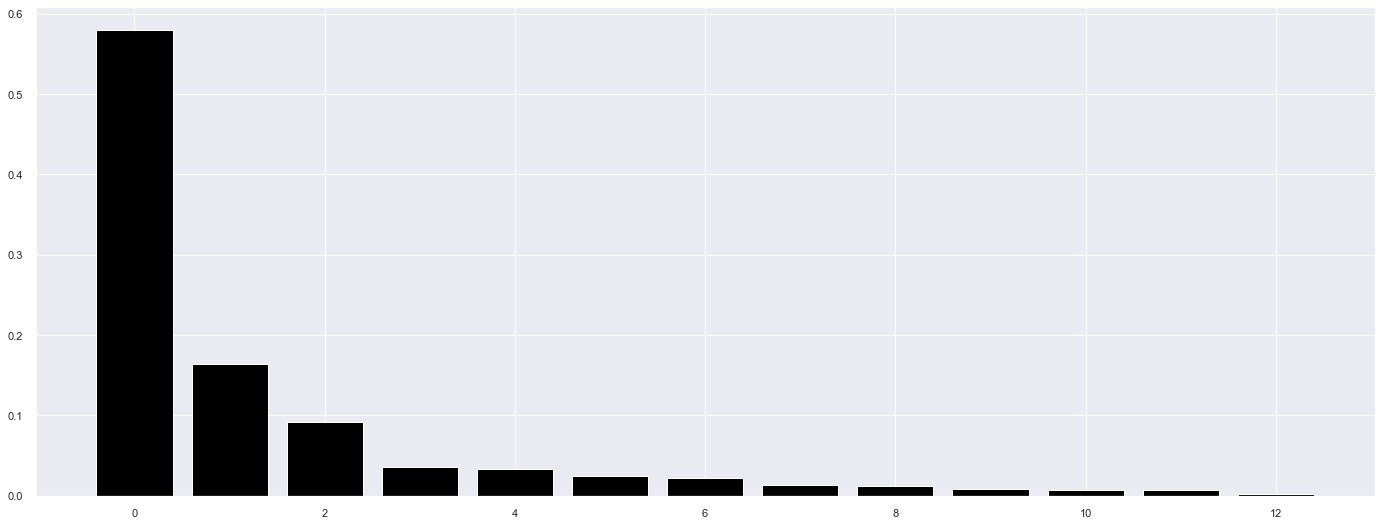

In [78]:
pca = dd.PCA( n_components=X.shape[1] )

principal_components = pca.fit_transform( X )

# plot explained variable
features = range( pca.n_components_ )

plt.bar( features[:100], pca.explained_variance_ratio_[:100], color='black' )

# pca component
df_pca = pd.DataFrame( principal_components )

In [79]:
dfx = pd.DataFrame([features, pca.explained_variance_ratio_])
dfx = dfx.T
dfx['sum'] = dfx.iloc[:,1].cumsum()
dfx

,0,1,sum
0,0.00,0.58,0.58
1,1.00,0.16,0.74
2,2.00,0.09,0.84
3,3.00,0.04,0.87
4,4.00,0.03,0.90
5,5.00,0.02,0.93
6,6.00,0.02,0.95
7,7.00,0.01,0.96
8,8.00,0.01,0.98
9,9.00,0.01,0.98


<AxesSubplot:xlabel='x', ylabel='y'>

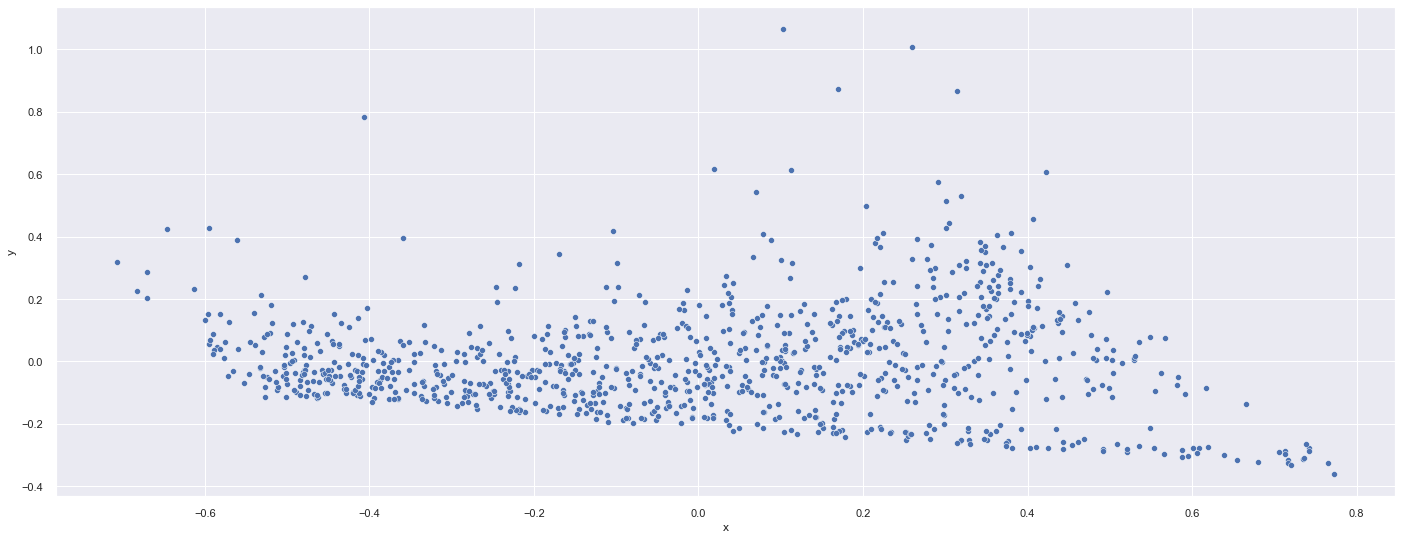

In [80]:
df_pca = df_pca.rename(columns={0:'x', 1: 'y'})
sns.scatterplot( x='x', y='y', data=df_pca)

###### UMAP

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

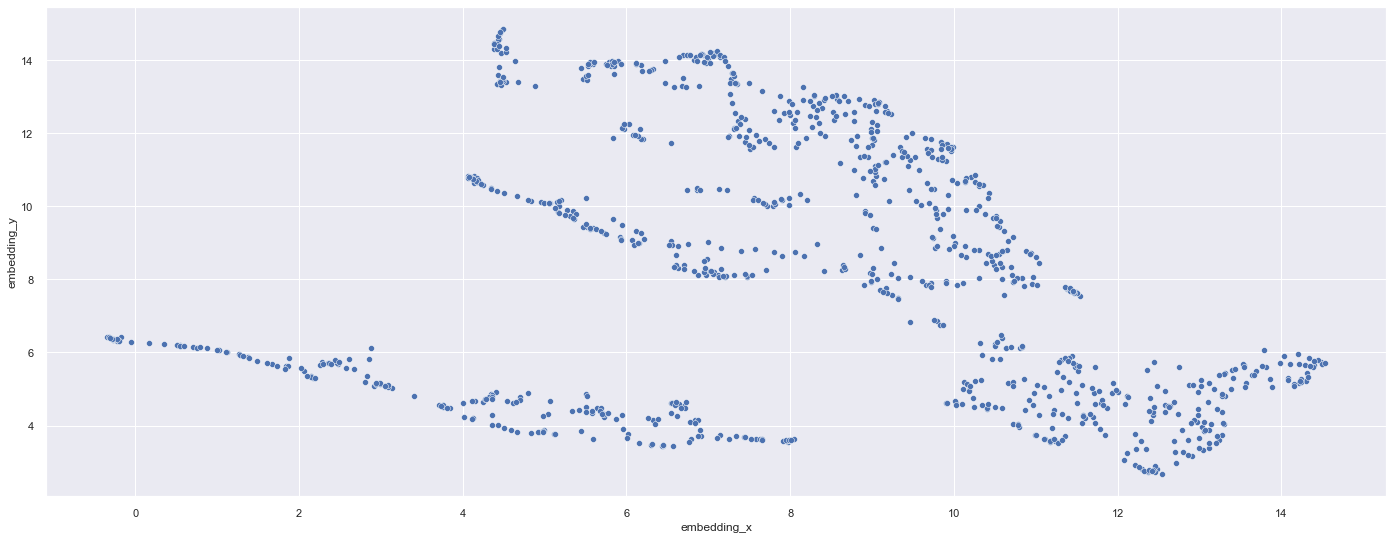

In [81]:
reducer = umap.UMAP( random_state=42, 
                     #xn_neighbors=2000,
                     #min_dist=0.1,
                     n_components=2,
                     #metric='euclidean' 
                   )
embedding = reducer.fit_transform( X )

# embedding
df_umap = pd.DataFrame()
df_umap['embedding_x'] = embedding[:, 0]
df_umap['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', 
                 y='embedding_y', 
                 data=df_umap )

##### t-SNE

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

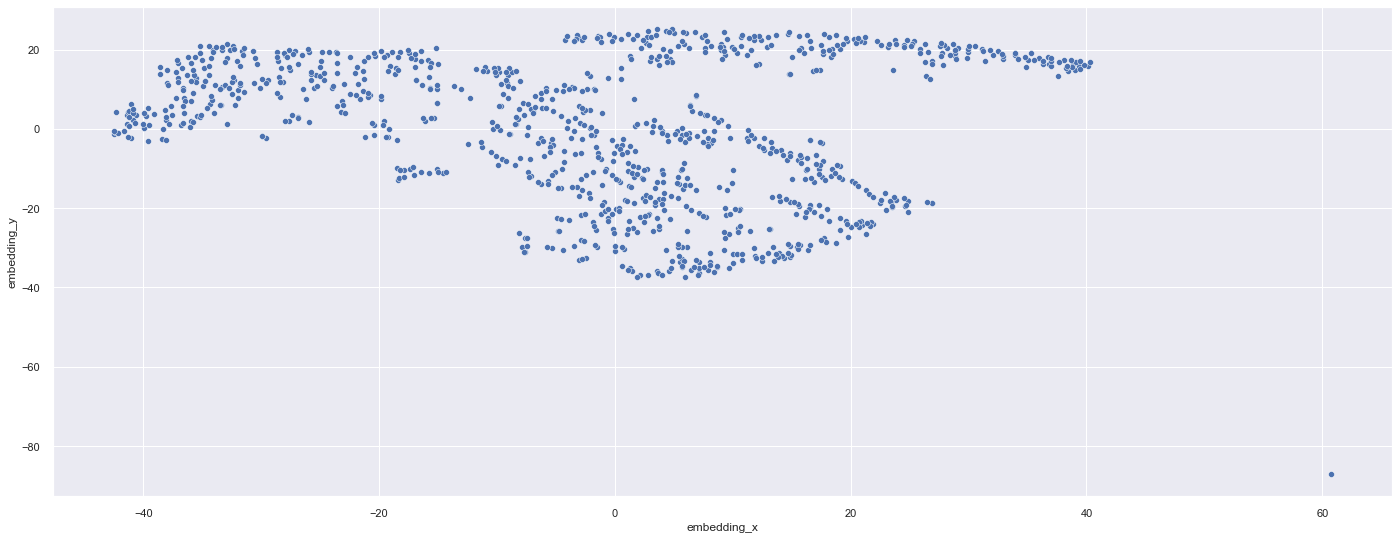

In [82]:
reducer = mn.TSNE( n_components=2, n_jobs=-1, random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_tsne = pd.DataFrame()
df_tsne['embedding_x'] = embedding[:, 0]
df_tsne['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', 
                 y='embedding_y', 
                 data=df_tsne )

#### Tree-Based Embedding

In [83]:
# training dataset - p_total
X_ = X.drop( columns=['avg_incoming'], axis=1 )
y = X['avg_incoming']

# model definition
rf_model = en.RandomForestRegressor( n_estimators=100, random_state=42 )

# model training
rf_model.fit( X_, y )

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [84]:
df_leaf = pd.DataFrame( rf_model.apply( X_ ) )

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

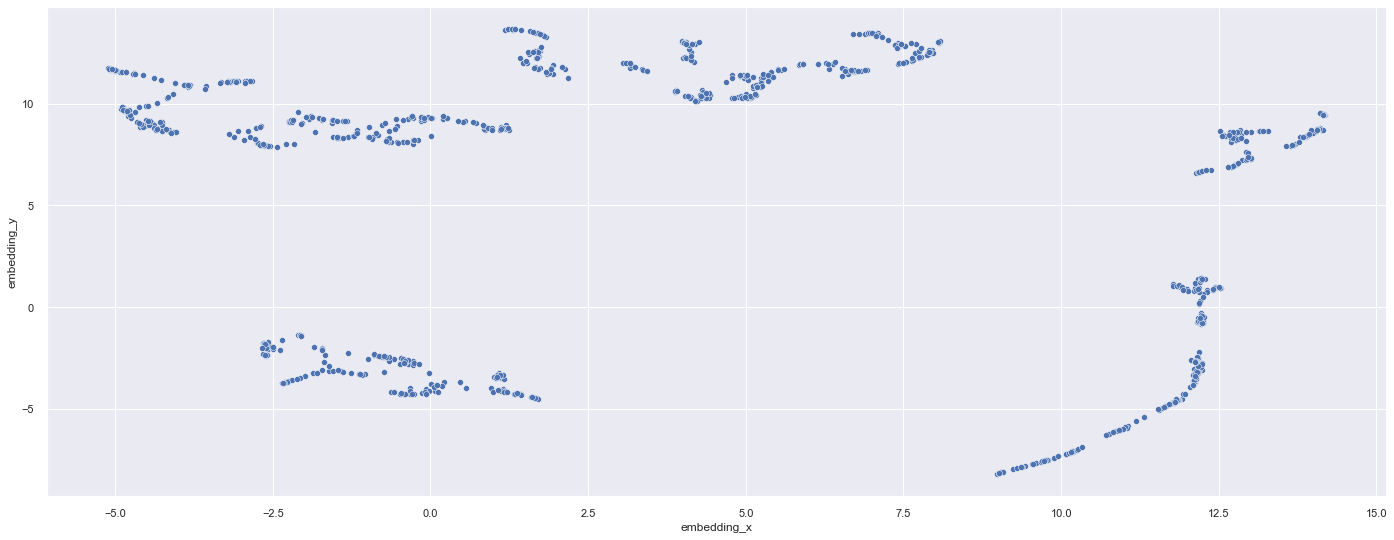

In [85]:
# Reduzer dimensionality
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( df_leaf )

# embedding
df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:, 0]
df_tree['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', 
                 y='embedding_y', 
                 data=df_tree )

In [86]:
df_tree.shape

(995, 2)

# <font color='red'> 5.0. Data Preparation </font>

In [87]:
df5 = df_tree.copy()
df5.head()

,embedding_x,embedding_y
0,1.53,11.99
1,-0.33,-2.81
2,-2.74,8.05
3,0.21,-3.68
4,12.75,8.32


## 5.1. NORMALIZATION

## 5.2. RESCALLING

## 5.3. TRANSFORMATION

# <font color='red'> 6.0. Feature Selection </font>

# <font color='red'> 7.0 MACHINE LEARNING MODELLING </font>

In [88]:
X = df5.copy()

In [89]:
clusters = range(2, 50)
#[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ]

In [90]:
X.shape

(995, 2)

## 7.1. Defining the number of Clusters - K-Means

In [91]:
kmeans_list = []
for k in clusters:
    # model definition
    kmeans_model = c.KMeans( n_clusters=k )

    # model training
    kmeans_model.fit( X )

    # model predict
    labels = kmeans_model.predict( X )

    # model performance
    sil = m.silhouette_score( X, labels, metric='euclidean' )
    kmeans_list.append( sil )
    #print('Cluster: ', k, 'Silhoutte Score: ', sil)
    print('Cluster:', k)

Cluster: 2
Cluster: 3
Cluster: 4
Cluster: 5
Cluster: 6
Cluster: 7
Cluster: 8
Cluster: 9
Cluster: 10
Cluster: 11
Cluster: 12
Cluster: 13
Cluster: 14
Cluster: 15
Cluster: 16
Cluster: 17
Cluster: 18
Cluster: 19
Cluster: 20
Cluster: 21
Cluster: 22
Cluster: 23
Cluster: 24
Cluster: 25
Cluster: 26
Cluster: 27
Cluster: 28
Cluster: 29
Cluster: 30
Cluster: 31
Cluster: 32
Cluster: 33
Cluster: 34
Cluster: 35
Cluster: 36
Cluster: 37
Cluster: 38
Cluster: 39
Cluster: 40
Cluster: 41
Cluster: 42
Cluster: 43
Cluster: 44
Cluster: 45
Cluster: 46
Cluster: 47
Cluster: 48
Cluster: 49


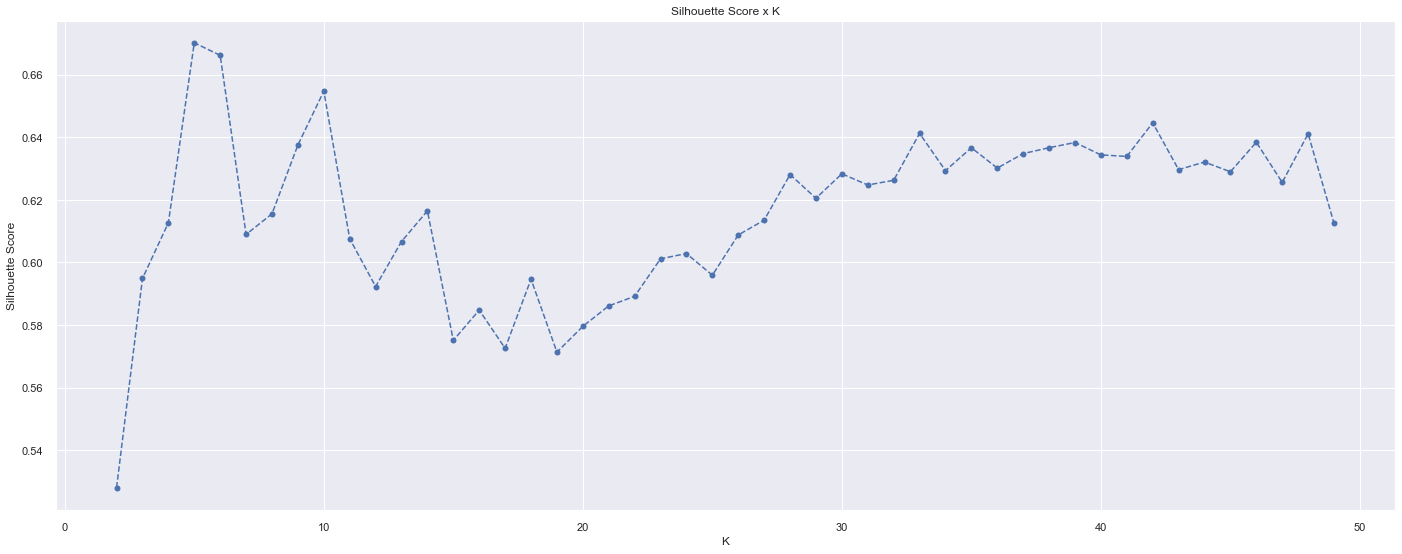

In [92]:
plt.plot( clusters, kmeans_list, linestyle='--', marker='o', color='b' )
plt.xlabel( 'K' );
plt.ylabel( 'Silhouette Score' );
plt.title( 'Silhouette Score x K' );

## 7.2. GMM

In [93]:
gmm_list = []
for k in clusters:
    # model definition
    gmm_model = mx.GaussianMixture( n_components=k )

    # model training
    gmm_model.fit( X )

    # model predict
    labels = gmm_model.predict( X )

    # model performance
    sil = m.silhouette_score( X, labels, metric='euclidean' )
    gmm_list.append( sil )
    print('Cluster:', k)

Cluster: 2
Cluster: 3
Cluster: 4
Cluster: 5
Cluster: 6
Cluster: 7
Cluster: 8
Cluster: 9
Cluster: 10
Cluster: 11
Cluster: 12
Cluster: 13
Cluster: 14
Cluster: 15
Cluster: 16
Cluster: 17
Cluster: 18
Cluster: 19
Cluster: 20
Cluster: 21
Cluster: 22
Cluster: 23
Cluster: 24
Cluster: 25
Cluster: 26
Cluster: 27
Cluster: 28
Cluster: 29
Cluster: 30
Cluster: 31
Cluster: 32
Cluster: 33
Cluster: 34
Cluster: 35
Cluster: 36
Cluster: 37
Cluster: 38
Cluster: 39
Cluster: 40
Cluster: 41
Cluster: 42
Cluster: 43
Cluster: 44
Cluster: 45
Cluster: 46
Cluster: 47
Cluster: 48
Cluster: 49


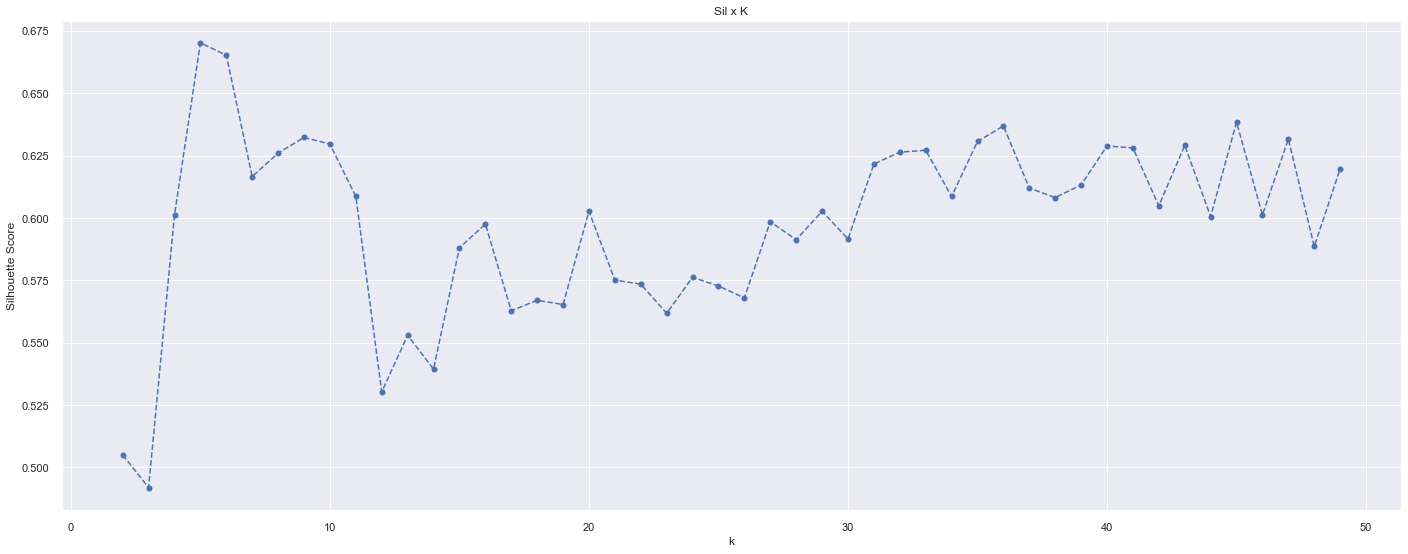

In [94]:
plt.plot( clusters, gmm_list, linestyle='--', marker='o', color='b' )
plt.xlabel( 'k');
plt.ylabel( 'Silhouette Score');
plt.title( 'Sil x K');

## 7.3. Hierarchical Clustering

In [95]:
from scipy.cluster import hierarchy as hc

In [96]:
# model definition and training
hc_model = hc.linkage( X, 'ward' )

[]

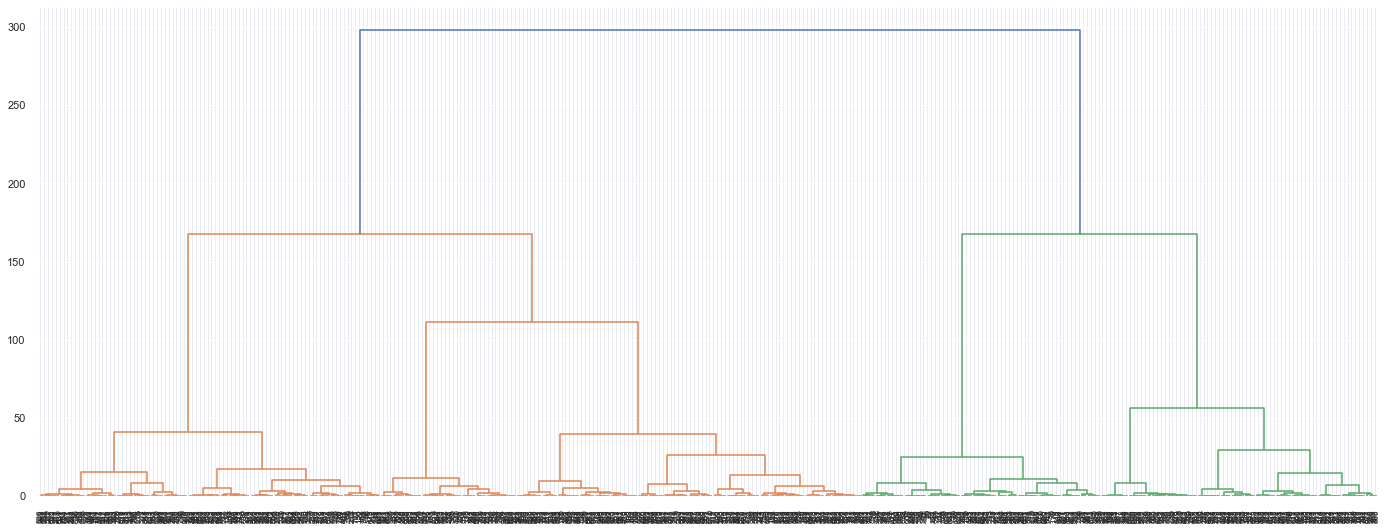

In [97]:
hc.dendrogram( 
    hc_model, 
    leaf_rotation=90,
    leaf_font_size=8
)

plt.plot()

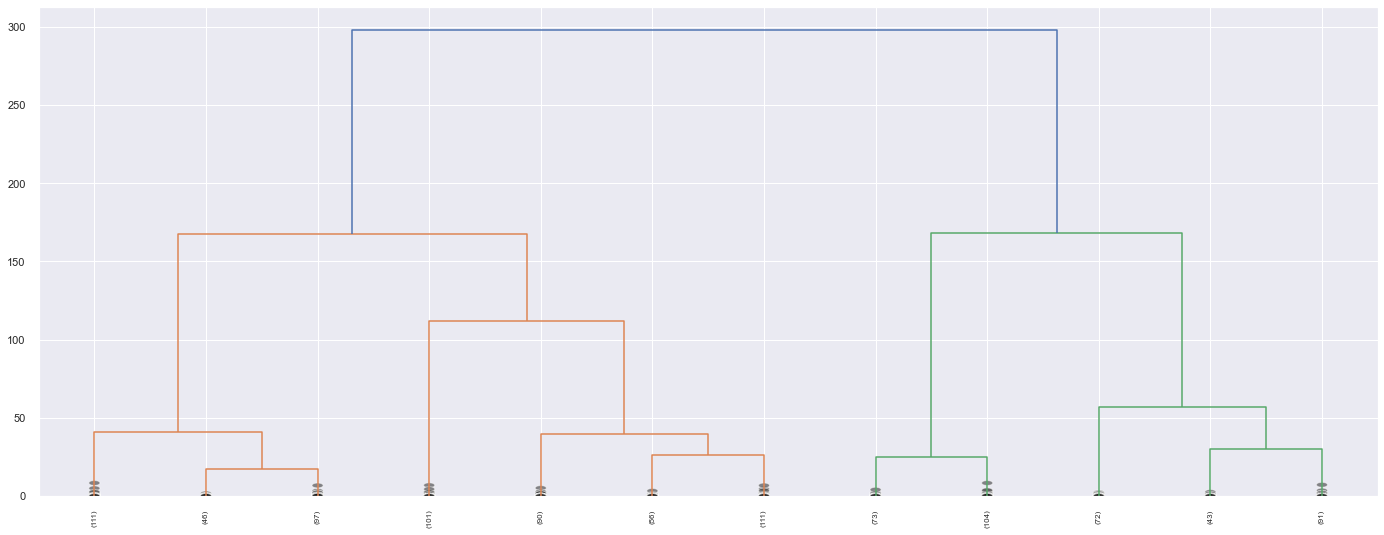

In [98]:
hc.dendrogram( 
    hc_model,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90,
    leaf_font_size=8,
    show_contracted=True
)

plt.show()

### 7.3.1. HClustering Silhouette Score

In [99]:
hc_list = []
for k in clusters:
    # model definition & training
    hc_model = hc.linkage( X, 'ward' )

    # model predict
    labels = hc.fcluster( hc_model, k, criterion='maxclust' )

    # metrics
    sil = m.silhouette_score( X, labels, metric='euclidean' )
    hc_list.append( sil )
    print('cluster', k)

cluster 2
cluster 3
cluster 4
cluster 5
cluster 6
cluster 7
cluster 8
cluster 9
cluster 10
cluster 11
cluster 12
cluster 13
cluster 14
cluster 15
cluster 16
cluster 17
cluster 18
cluster 19
cluster 20
cluster 21
cluster 22
cluster 23
cluster 24
cluster 25
cluster 26
cluster 27
cluster 28
cluster 29
cluster 30
cluster 31
cluster 32
cluster 33
cluster 34
cluster 35
cluster 36
cluster 37
cluster 38
cluster 39
cluster 40
cluster 41
cluster 42
cluster 43
cluster 44
cluster 45
cluster 46
cluster 47
cluster 48
cluster 49


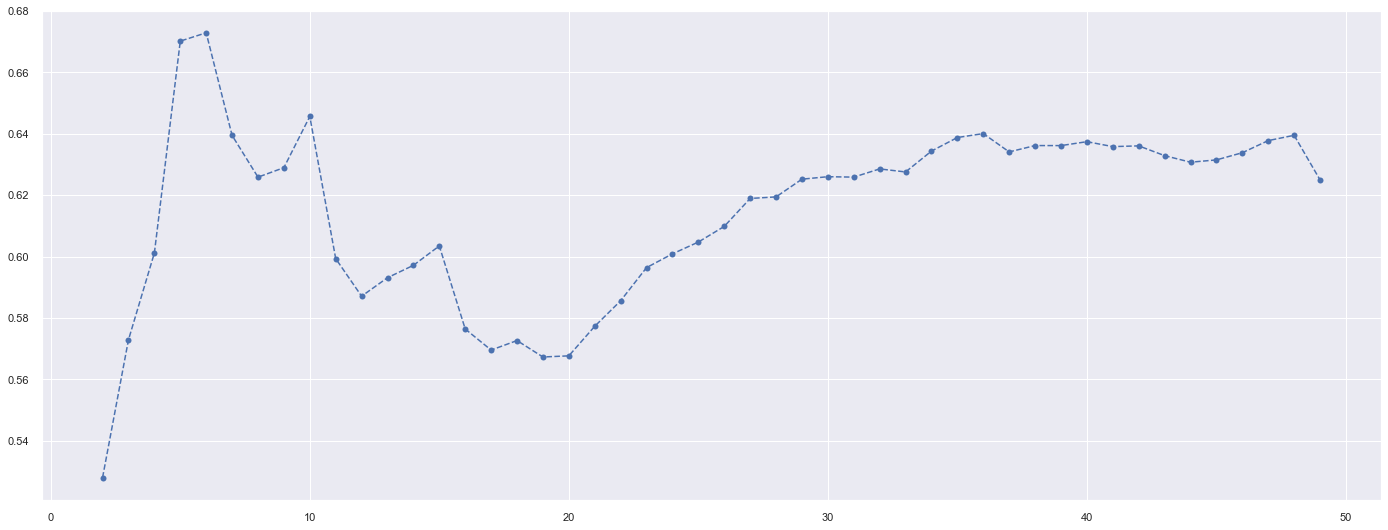

In [100]:
plt.plot( clusters,  hc_list, linestyle='--', marker='o', color='b' )

## 7.4. DBSCAN

In [101]:
eps=1.5
min_samples=10

# model definition
dbscan_model = c.DBSCAN( eps=eps, min_samples=min_samples )

# mode training & predict 
labels = dbscan_model.fit_predict( X )

sil = m.silhouette_score( X, labels, metric='euclidean' )
print( 'Silhouette Score: {}'.format( sil ) )
print( 'Number of Clusters: {}'.format( len( unique( labels ) ) ) )
print( unique( labels ) )

Silhouette Score: 0.6702106595039368
Number of Clusters: 5
[0 1 2 3 4]


In [102]:
from sklearn.neighbors import NearestNeighbors

In [103]:
neighbors = NearestNeighbors( n_neighbors=min_samples ).fit( X )
distances, indices = neighbors.kneighbors( X )

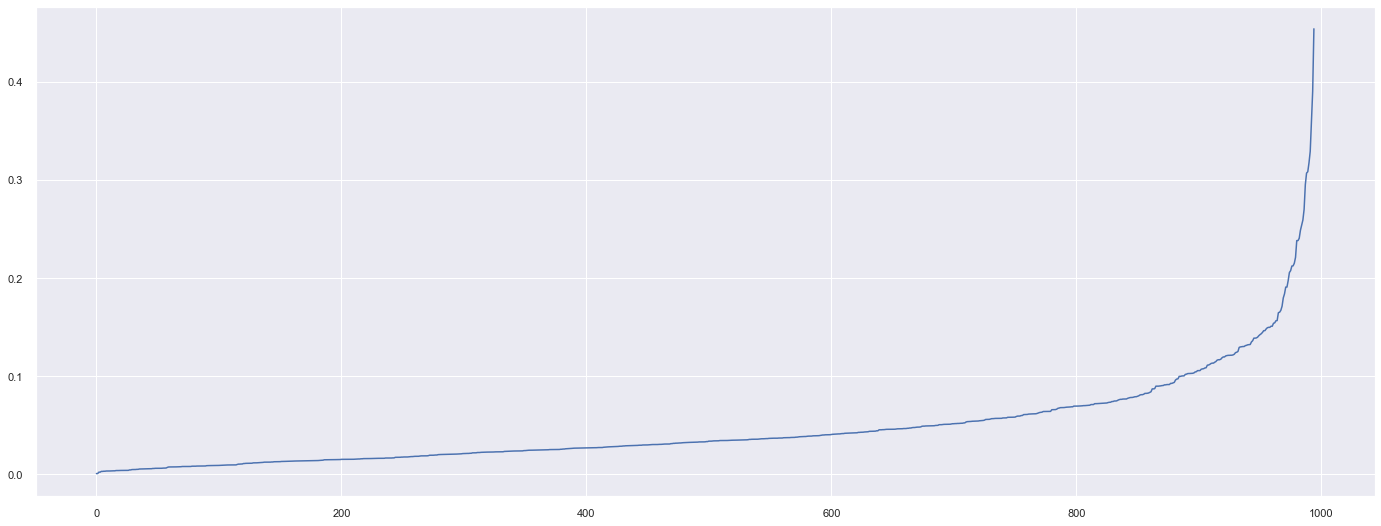

In [104]:
distances = np.sort( distances, axis=0 )
distances = distances[:,1]
plt.plot( distances )

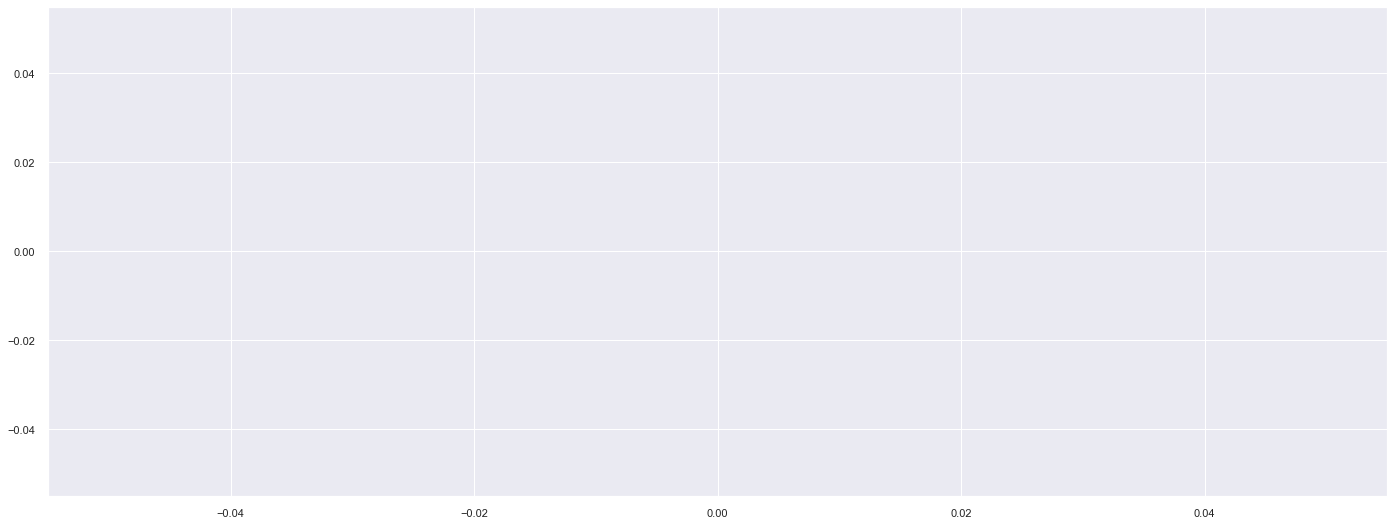

In [105]:
plt.plot( distances[5500:] )

In [106]:
dbscan_list = [ 0.622034, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000]

## 7.5. Results

In [107]:
df_results = pd.DataFrame( 
    {'KMeans': kmeans_list, 
     'GMM': gmm_list, 
     'HC': hc_list, 
     #'DBSCAN': dbscan_list
    }
).T

df_results.columns = clusters

In [108]:
df_results.style.highlight_max( color='lightgreen', axis=1 )

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
KMeans,0.528048,0.594879,0.612700,0.670211,0.666195,0.608947,0.615544,0.637542,0.654750,0.607598,0.592309,0.606694,0.616493,0.575095,0.584776,0.572559,0.594657,0.571332,0.579575,0.586117,0.589180,0.601179,0.602843,0.595925,0.608792,0.613522,0.628088,0.620520,0.628339,0.624765,0.626257,0.641245,0.629353,0.636670,0.630166,0.634795,0.636674,0.638342,0.634381,0.633890,0.644635,0.629665,0.632101,0.628985,0.638428,0.625583,0.641129,0.612509
GMM,0.504938,0.491863,0.601198,0.670211,0.665230,0.616563,0.625971,0.632251,0.629588,0.608601,0.530173,0.552955,0.539337,0.588019,0.597524,0.562766,0.566973,0.565253,0.602644,0.575051,0.573441,0.561742,0.576184,0.572688,0.567908,0.598460,0.591248,0.602654,0.591566,0.621622,0.626350,0.627126,0.608601,0.630640,0.636864,0.611964,0.608144,0.613226,0.628843,0.628056,0.604823,0.629094,0.600524,0.638380,0.601207,0.631606,0.588567,0.619628
HC,0.528048,0.572918,0.601198,0.670211,0.672916,0.639490,0.625898,0.628986,0.645673,0.599356,0.587124,0.593143,0.597179,0.603493,0.576439,0.569576,0.572673,0.567321,0.567691,0.577321,0.585635,0.596435,0.600913,0.604758,0.609854,0.618955,0.619466,0.625240,0.626044,0.625908,0.628580,0.627592,0.634388,0.638805,0.640087,0.634121,0.636187,0.636177,0.637450,0.635845,0.636084,0.632904,0.630764,0.631512,0.633855,0.637803,0.639530,0.625019


## 7.6. Silhouette Analysis

 For K = 2. Silhouette Score: 0.5280476808547974
 For K = 3. Silhouette Score: 0.5729175806045532
 For K = 4. Silhouette Score: 0.6011975407600403
 For K = 5. Silhouette Score: 0.6702106595039368
 For K = 6. Silhouette Score: 0.6729162335395813
 For K = 7. Silhouette Score: 0.6394899487495422


IndexError: index 3 is out of bounds for axis 0 with size 3

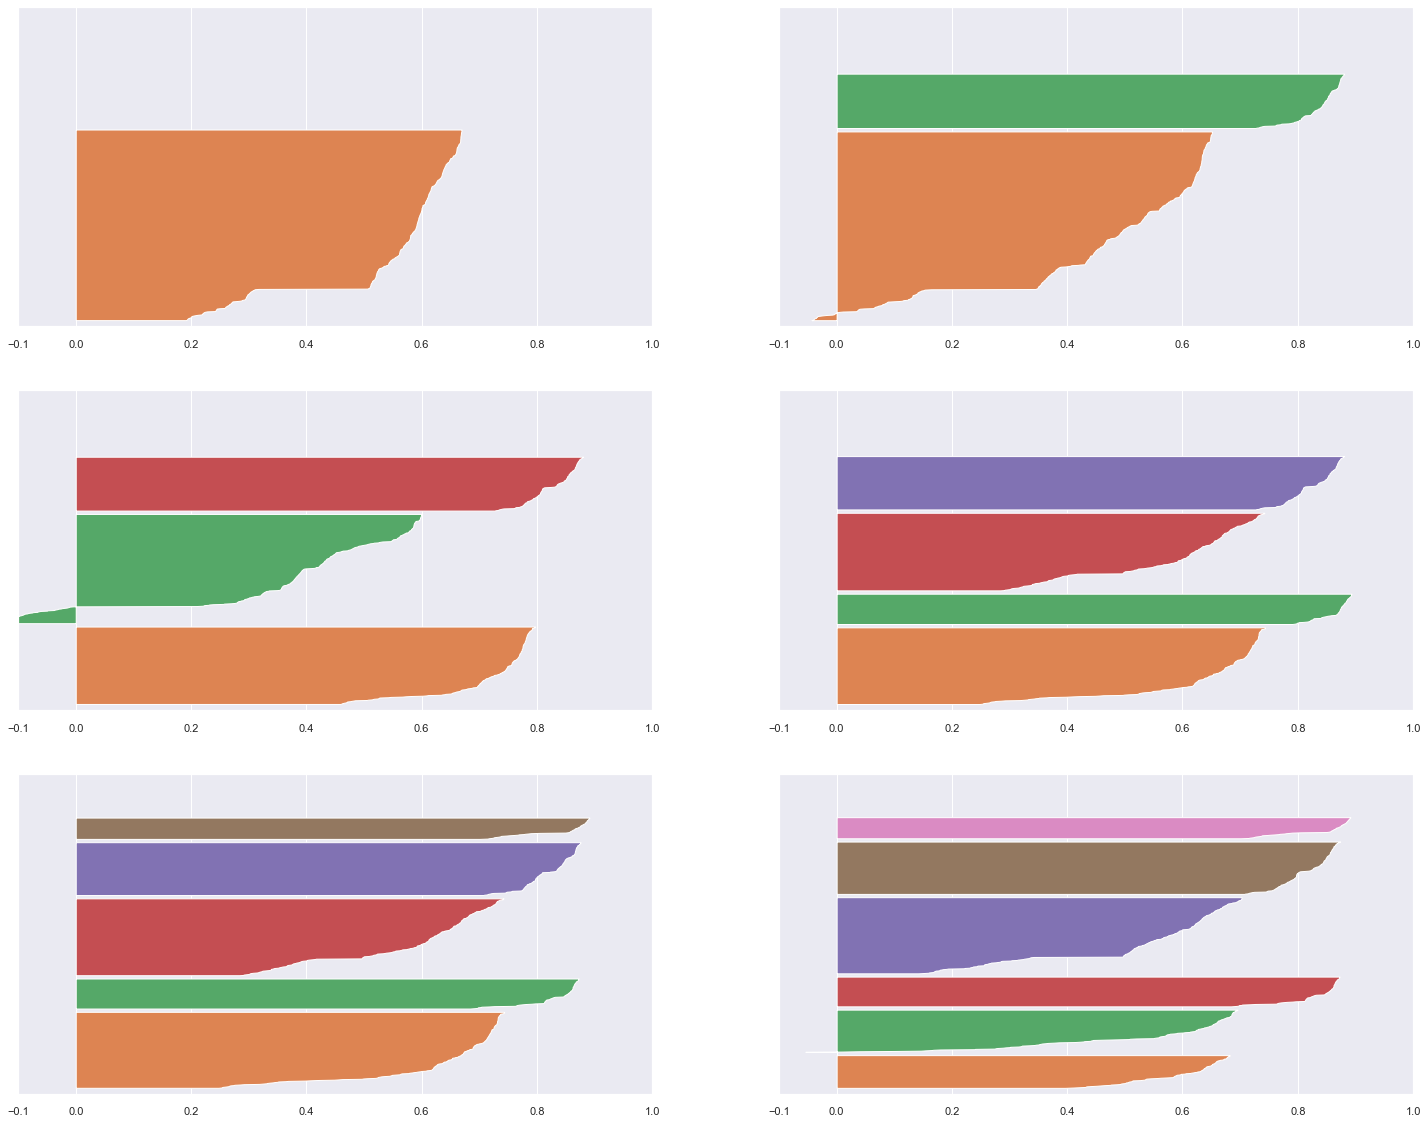

In [109]:
fig, ax = plt.subplots( 3, 2 )
fig.set_size_inches( 25, 20 )

for k in clusters:
    q, mod = divmod( k, 2 )
    
    ax[q-1, mod].set_xlim( [ -0.1, 1] )
    ax[q-1, mod].set_ylim( [ 0, len( X ) + ( k+1 )*10] )
    
    # model definition & training
    hc_model = hc.linkage( X, 'ward' )

    # model predict
    labels = hc.fcluster( hc_model, k, criterion='maxclust' )

    # performance
    ss = m.silhouette_score( X, labels, metric='euclidean' )
    print( ' For K = {}. Silhouette Score: {}'.format( k, ss ) )

    samples_silhouette_values = m.silhouette_samples( X, labels )

    y_lower = 10
    for i in range( k ):

        # select clusters
        ith_samples_silhouette_values = samples_silhouette_values[ labels == i]
        
        # sort values
        ith_samples_silhouette_values.sort()

        # size clusters
        size_cluster_i = ith_samples_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = cm.get_cmap( 'Spectral' )
        color = cmap( i / k )

        ax[q-1, mod].fill_betweenx( np.arange( y_lower, y_upper ), 0, ith_samples_silhouette_values  )
        
        y_lower = y_upper + 10
        
    ax[q-1, mod].set_yticks([])
    ax[q-1, mod].set_xticks( [-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# <font color='red'> 8.0 HYPERPARAMETER FINE TUNNING </font>

## 8.1. K-Means

In [110]:
# model definition
k = 5
kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42) #max_iter iterações para achar o centróide

# model training
kmeans.fit(X)

#clustering
labels = kmeans.labels_

## 8.2. Cluster Validation

In [111]:
## WSS (within-cluster sum of square)
print('WSS Values: {}'.format(kmeans.inertia_))

## SS (Silhouette Score)
print('SS Values: {}'.format(m.silhouette_score(X, labels, metric='euclidean')))

#WSS Values: 5546.332248871417
#SS Values: 0.6702106595039368

WSS Values: 5546.332248871417
SS Values: 0.6702106595039368


# <font color='red'> 9.0. Cluster Analysis </font>

In [112]:
df9 = df4_a.copy()
df9['cluster'] = labels
df9.head()

,customer_id,range_0_5,range_5_10,range_10_50,range_50_100,range_100,total_postal,total_gross_revenue_adj,date_interval,buy_rate,customer_by_day,devolution,p_total,avg_incoming,cluster
2,12348,2332,0,0,0,0,360.00,1437.24,283,70.75,5.08,0.00,1.20,359.31,0
9,12356,1450,42,81,0,0,324.00,2487.43,303,101.00,8.21,-0.00,0.28,829.14,1
11,12358,166,74,2,0,0,240.00,928.06,149,74.50,6.23,0.00,1.29,464.03,3
13,12360,1100,32,24,0,0,360.00,2302.06,148,49.33,15.55,-0.00,1.49,767.35,1
16,12363,402,6,0,0,0,0.00,552.00,133,66.50,4.15,0.00,0.85,276.00,2


In [113]:
df9.shape

(995, 15)

In [114]:
X_l = X.copy()
X_l['cluster'] = labels
X_l.head()

,embedding_x,embedding_y,cluster
0,1.53,11.99,0
1,-0.33,-2.81,1
2,-2.74,8.05,3
3,0.21,-3.68,1
4,12.75,8.32,2


## 9.1. Visualization

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

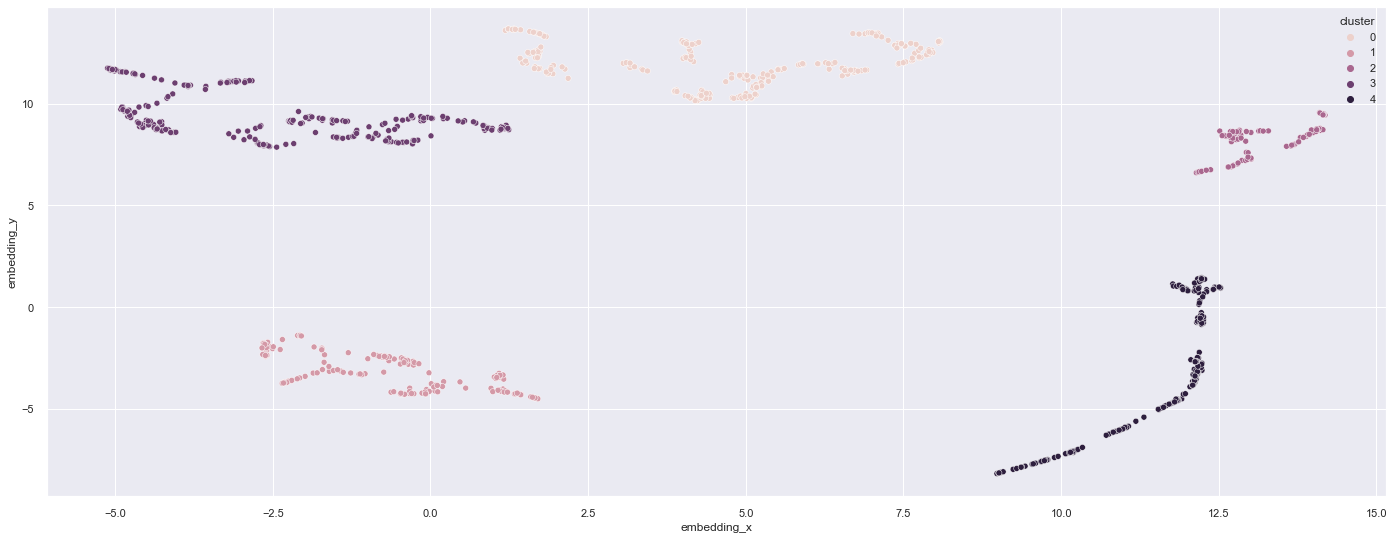

In [115]:
sns.scatterplot( x='embedding_x', 
                 y='embedding_y', 
                 data=X_l, hue='cluster')

## 9.1. Cluster Profile

In [116]:
df9.columns

Index(['customer_id', 'range_0_5', 'range_5_10', 'range_10_50', 'range_50_100',
       'range_100', 'total_postal', 'total_gross_revenue_adj', 'date_interval',
       'buy_rate', 'customer_by_day', 'devolution', 'p_total', 'avg_incoming',
       'cluster'],
      dtype='object')

In [117]:
df_cluster = pd.DataFrame()
# Number of customer
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index().rename(columns={'customer_id': 'total_customers'})
df_cluster['perc_customer'] = 100*(df_cluster['total_customers'] / df_cluster['total_customers'].sum())

## Avg quantity
#df_avg_avg_qt = df9[['quantity', 'cluster']].groupby('cluster').mean().reset_index()
#df_cluster = pd.merge(df_cluster, df_avg_avg_qt, how='inner', on='cluster')

# Avg total postal
df_avg_total_postal = df9[['total_postal', 'cluster']].groupby('cluster').mean().reset_index().rename(columns={'total_postal': 'avg_total_postal'})
df_cluster = pd.merge(df_cluster, df_avg_total_postal, how='inner', on='cluster')

## Avg invoice
#df_avg_invoice_no = df9[['total_invoices', 'cluster']].groupby('cluster').mean().reset_index()
#df_cluster = pd.merge(df_cluster, df_avg_invoice_no, how='inner', on='cluster')

# Avg total_gross_revenue_adj
df_avg_gav_ajd = df9[['total_gross_revenue_adj', 'cluster']].groupby('cluster').mean().reset_index().rename(columns={'total_gross_revenue_adj': 'avg_gross_revenue_adj'})
df_cluster = pd.merge(df_cluster, df_avg_gav_ajd, how='inner', on='cluster')

# Avg date_interval
df_avg_gav_ajd = df9[['date_interval', 'cluster']].groupby('cluster').mean().reset_index().rename(columns={'date_interval': 'avg_date_interval'})
df_cluster = pd.merge(df_cluster, df_avg_gav_ajd, how='inner', on='cluster')

# Avg buy_rate
df_avg_gav_ajd = df9[['buy_rate', 'cluster']].groupby('cluster').mean().reset_index().rename(columns={'buy_rate': 'avg_buy_rate'})
df_cluster = pd.merge(df_cluster, df_avg_gav_ajd, how='inner', on='cluster')

# Avg customer_by_day
df_avg_gav_ajd = df9[['customer_by_day', 'cluster']].groupby('cluster').mean().reset_index().rename(columns={'customer_by_day': 'avg_customer_by_day'})
df_cluster = pd.merge(df_cluster, df_avg_gav_ajd, how='inner', on='cluster')

# Avg p_total
df_avg_p_total = df9[['p_total', 'cluster']].groupby('cluster').mean().reset_index().rename(columns={'p_total': 'avg_p_total'})
df_cluster = pd.merge(df_cluster, df_avg_p_total, how='inner', on='cluster')

# Avg avg_incomingl
df_avg_incoming = df9[['avg_incoming', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_incoming, how='inner', on='cluster')

In [118]:
df_cluster.sort_values('avg_incoming', ascending=False)

,cluster,total_customers,perc_customer,avg_total_postal,avg_gross_revenue_adj,avg_date_interval,avg_buy_rate,avg_customer_by_day,avg_p_total,avg_incoming
1,1,177,17.79,54.21,3883.61,251.51,41.30,18.93,5.27,618.76
3,3,254,25.53,15.29,1192.19,114.60,34.35,16.29,4.49,376.39
0,0,257,25.83,6.80,964.83,255.92,71.41,3.91,3.30,262.52
2,2,101,10.15,6.98,509.01,166.48,63.94,7.12,2.27,204.26
4,4,206,20.70,2.24,287.79,141.52,64.34,4.20,1.42,131.73


### Cluster 01:  ( Candidate for Insiders )
- Number of Customers: 177 (17,79% of customers )
- Avg Gross Revenue Adjusted: \$94.772,63
- Avg Postal Cost: \$54,21
- Avg Date Interval: 251,51 days of fidelity
- Avg Buy Rate: 41.30 days for a new purchase
- Avg Customer by Day: \$18,93 each day
- Avg Percentual Growth Total: 527% accumulated
- Avg Incoming from Invoice: \$618,76
        
### Cluster 02: (Younger customer with high rate of purchase)
- Number of Customers: 354 (25,53% of customers )
- Avg Gross Revenue Adjusted: \$1.192,19
- Avg Postal Cost: \$15,29
- Avg Date Interval: 114,60 days of fidelity
- Avg Buy Rate: 34,35 days for a new purchase
- Avg Customer by Day: \$16,29 each day
- Avg Percentual Growth Total: 449% accumulated
- Avg Incoming from Invoice: \$376,39
        
### Cluster 03: (Older customers but do not buy very often)
- Number of Customers: 257 (25,83% of customers )
- Avg Gross Revenue Adjusted: \$964,83
- Avg Postal Cost: \$6,80
- Avg Date Interval: 255,92 days of fidelity
- Avg Buy Rate: 71,41 days for a new purchase
- Avg Customer by Day: \$3,91 each day
- Avg Percentual Growth Total: 330% accumulated
- Avg Incoming from Invoice: \$262,26
    
### Cluster 04: (Median customer with low gross revenue)
- Number of Customers: 101 (10,15% of customers )
- Avg Gross Revenue Adjusted: \$509,01
- Avg Postal Cost: \$6,98
- Avg Date Interval: 166,48 days of fidelity
- Avg Buy Rate: 63,94 days for a new purchase
- Avg Customer by Day: \$7,12 each day
- Avg Percentual Growth Total: 227% accumulated
- Avg Incoming from Invoice: $204,26
    
### Cluster 05: (Low Gross Revenue)
- Number of Customers: 206 (20,70% of customers )
- Avg Gross Revenue Adjusted: \$287,79
- Avg Postal Cost: \$ 2,24
- Avg Date Interval: 141,52 days of fidelity
- Avg Buy Rate: 64,94 days for a new purchase
- Avg Customer by Day: \$4,20 each day
- Avg Percentual Growth Total: 142% accumulated
- Avg Incoming from Invoice: \$131,73
    


In [119]:
df9[df9['cluster'] == 1].sort_values('p_total', ascending=False).head(50)

,customer_id,range_0_5,range_5_10,range_10_50,range_50_100,range_100,total_postal,total_gross_revenue_adj,date_interval,buy_rate,customer_by_day,devolution,p_total,avg_incoming,cluster
694,13263,4479,256,38,0,0,0.00,7439.07,324,9.53,22.96,-10.22,51.44,218.80,1
1139,13880,1793,42,7,0,0,0.00,3219.77,346,26.62,9.31,0.00,31.92,247.67,1
3299,16814,2366,367,30,0,0,0.00,6500.60,355,16.14,18.31,-1.40,22.78,295.48,1
167,12557,4384,0,0,0,0,0.00,11990.96,355,71.00,33.78,0.00,18.34,2398.19,1
4043,17857,14822,0,0,0,0,0.00,26763.34,362,14.48,73.93,-1461.80,17.87,1070.53,1
3708,17396,1748,144,112,0,0,0.00,7330.80,332,41.50,22.08,-18.00,17.40,916.35,1
3036,16458,2148,6,0,0,0,0.00,3482.74,358,19.89,9.73,0.00,16.96,193.49,1
2751,16081,1402,51,24,0,0,0.00,2806.90,310,62.00,9.05,-0.00,16.81,561.38,1
4157,18008,1562,11,8,0,0,0.00,2116.19,248,27.56,8.53,0.00,15.18,235.13,1
312,12726,3084,48,0,0,0,198.00,2411.10,329,47.00,7.33,0.00,14.83,344.44,1


In [120]:
df9[df9['cluster'] == 3].sort_values('p_total', ascending=False).head(50)

,customer_id,range_0_5,range_5_10,range_10_50,range_50_100,range_100,total_postal,total_gross_revenue_adj,date_interval,buy_rate,customer_by_day,devolution,p_total,avg_incoming,cluster
1432,14285,402,108,31,0,0,0.00,1910.01,155,38.75,12.32,-0.00,322.73,477.50,3
3201,16692,0,151,0,0,0,150.00,1126.00,33,16.50,34.12,0.00,131.47,563.00,3
4000,17788,101,109,0,0,0,4.95,1112.95,56,28.00,19.87,0.00,93.72,556.48,3
2442,15653,1200,0,0,0,0,0.00,877.44,23,11.50,38.15,0.00,17.28,438.72,3
774,13368,301,23,2,1,0,0.00,623.40,81,40.50,7.70,0.00,16.61,311.70,3
4239,18122,1179,40,3,1,0,0.00,1826.21,142,23.67,12.86,-6.17,14.27,304.37,3
3042,16466,729,47,13,0,0,0.00,1603.46,259,37.00,6.19,-0.00,13.36,229.07,3
1743,14704,974,66,32,0,0,0.00,1516.91,161,23.00,9.42,-12.24,12.66,216.70,3
3499,17092,1126,3,2,0,0,0.00,1777.78,227,56.75,7.83,-0.00,12.18,444.45,3
1526,14418,1654,38,18,1,0,0.00,1937.25,105,35.00,18.45,-0.00,11.88,645.75,3


In [121]:
df2[df2['customer_id'] == 18102]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,description,customer_id
16418,537657,82484,408,2016-12-05,4.78,United Kingdom,WOOD BLACK BOARD ANT WHITE FINISH,18102
16419,537657,22830,30,2016-12-05,19.84,United Kingdom,UTILTY CABINET WITH HOOKS,18102
16420,537657,22189,972,2016-12-05,2.31,United Kingdom,CREAM HEART CARD HOLDER,18102
16421,537657,22188,972,2016-12-05,2.31,United Kingdom,BLACK HEART CARD HOLDER,18102
16422,537657,21623,408,2016-12-05,6.38,United Kingdom,VINTAGE UNION JACK MEMOBOARD,18102
16423,537658,82484,48,2016-12-05,4.78,United Kingdom,WOOD BLACK BOARD ANT WHITE FINISH,18102
16424,537658,22189,36,2016-12-05,2.31,United Kingdom,CREAM HEART CARD HOLDER,18102
16425,537658,22188,36,2016-12-05,2.31,United Kingdom,BLACK HEART CARD HOLDER,18102
16426,537659,22765,23,2016-12-05,9.89,United Kingdom,NEWSPAPER STAND,18102
16427,537659,22507,208,2016-12-05,3.86,United Kingdom,MEMO BOARD RETROSPOT DESIGN,18102


# <font color='red'> 10.0. EDA </font>

In [122]:
df10 = df9.copy()

## 10.1 MINDMAP HYPOTHESIS - INSIDERS CLUSTER

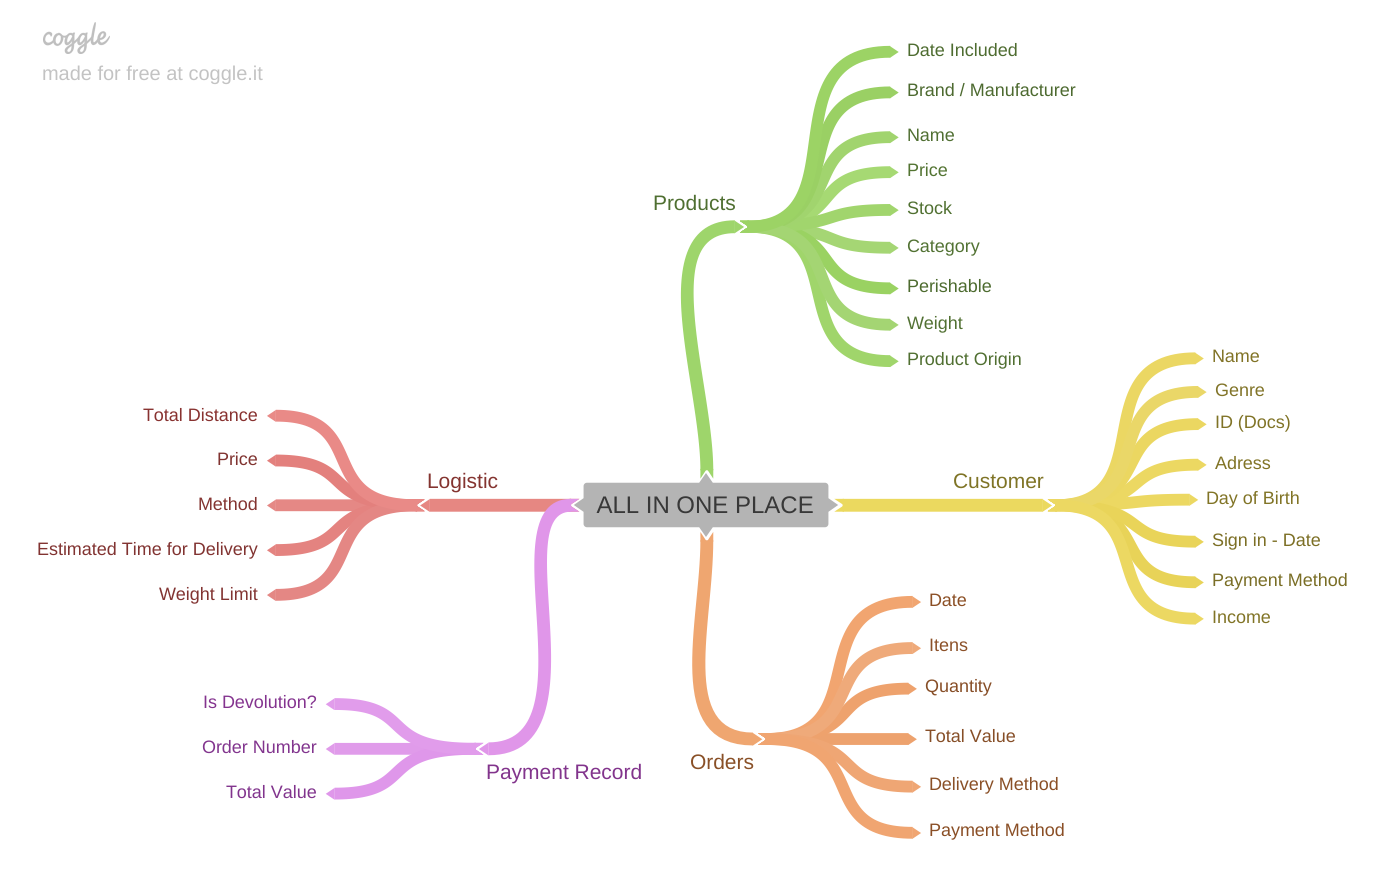

In [123]:
Image('../img/ALL_IN_ONE_PLACE.png', width=700, height=700)

### 10.1.1 PRODUCTS HYPOTHESIS

1. <s>The oldest product registered should sell more</s> - No data available
2. <s>Brand with more customer buying should represent 10% of total sales from its category</s> - No data available
3. Cheaper products should sell 15% more than other products
4. <s>Product which have more units in stock should sell more than 10% compared to other with lower stock</s> - No data available
5. <s>Perishable products should have more purchase when it is included in the system</s> - No data available
6. <s>Heavy products should represent 5% of total of sales.</s> - No data available
7. <s>The most common country product should represent 10% of sales.</s> - No data available

### 10.1.2 CUSTOMER HYPOTHESIS

1. <s>Female should by more perishable products than man.</s> - No data available
2. <s>Customers should buy more expensive items close to their birthday.</s> - No data available
3. <s>The most payment method used is credit card</s> - No data available
4. <s>Higher is the incoming, more expensive products should customer buy.</s> - No data available

### 10.1.3 LOGISTIC HYPOTHESIS

1. <s>Sells with products delivered in higher range should sell less.</s> - No data available
2. <s>The most cheaper delivery method should represent 40% of sells.</s> - No data available
3. <s>The most choosen method of delivery should be the cheaper one.</s> - No data available
4. <s>Method with higher time for delivery should sell less.</s> - No data available

### 10.1.4 ORDERS / PAYMENT HYPOTHESIS

1. <s>Orders with higher value should return 10% more.</s> - No data available
2. <s>The most used delivery method should represent 20% of orders.</s> - No data available
3. <s>Credit card should be the most used method of payment.</s> - No data available

### 10.1.5 ANSWERABLE HYPOTHESIS

In [124]:
df10_insiders = df10[df10['cluster']==1]

In [125]:
df10_insiders.head()

,customer_id,range_0_5,range_5_10,range_10_50,range_50_100,range_100,total_postal,total_gross_revenue_adj,date_interval,buy_rate,customer_by_day,devolution,p_total,avg_incoming,cluster
9,12356,1450,42,81,0,0,324.00,2487.43,303,101.00,8.21,-0.00,0.28,829.14,1
13,12360,1100,32,24,0,0,360.00,2302.06,148,49.33,15.55,-0.00,1.49,767.35,1
34,12388,1305,124,33,0,0,0.00,2780.66,311,51.83,8.94,0.00,5.45,463.44,1
40,12397,1162,55,33,0,0,195.00,2214.90,100,50.00,22.15,-0.00,1.00,1107.45,1
49,12408,1323,40,10,0,0,270.00,2587.57,228,28.50,11.35,-58.12,2.32,323.45,1


#### H1. Cheaper products should sell 15% more than other products
FALSE: Cheaper product sell almost 80% more than other products

In [126]:
aux = df10_insiders[['range_0_5', 'range_5_10', 'range_10_50', 'range_50_100', 'range_100']].sum()
c = [2.5, 7.5, 25, 75, 100]
aux = pd.DataFrame(data={'range':aux, 'avg_price':c})
aux['total'] = aux['range'] * aux['avg_price']
aux['percentage'] = aux['total'] / aux['total'].sum()*100
aux.head()

,range,avg_price,total,percentage
range_0_5,391802,2.50,979505.00,79.84
range_5_10,17858,7.50,133935.00,10.92
range_10_50,4427,25.00,110675.00,9.02
range_50_100,9,75.00,675.00,0.06
range_100,20,100.00,2000.00,0.16


# <font color='red'> 11.0. BUSINESS PROBLEM ANSWER </font>

## 1. Which customers can participate into "Insiders" program?
<font size=1>Quem são as pessoas elegíveis para participar do programa de Insiders?</font>

In [127]:
print('\"Insiders\" customer id :', df10_insiders['customer_id'].unique().tolist())

"Insiders" customer id : [12356, 12360, 12388, 12397, 12408, 12409, 12428, 12429, 12432, 12438, 12444, 12449, 12477, 12480, 12490, 12502, 12557, 12562, 12600, 12615, 12627, 12637, 12643, 12653, 12670, 12684, 12685, 12700, 12726, 12744, 12747, 12758, 12766, 12798, 12856, 12910, 12913, 13015, 13027, 13174, 13178, 13183, 13199, 13263, 13265, 13285, 13297, 13340, 13344, 13450, 13555, 13571, 13629, 13685, 13742, 13758, 13804, 13831, 13842, 13868, 13869, 13880, 13953, 13994, 14005, 14101, 14125, 14135, 14163, 14262, 14282, 14307, 14360, 14408, 14440, 14461, 14466, 14482, 14503, 14506, 14530, 14544, 14554, 14730, 14739, 14828, 14930, 15058, 15089, 15105, 15129, 15218, 15245, 15394, 15410, 15485, 15572, 15581, 15665, 15673, 15727, 15752, 15797, 15815, 15854, 15867, 16003, 16011, 16041, 16081, 16098, 16126, 16131, 16182, 16209, 16210, 16241, 16258, 16308, 16327, 16333, 16407, 16409, 16456, 16458, 16477, 16497, 16532, 16556, 16698, 16709, 16710, 16712, 16771, 16814, 16904, 16940, 16945, 16954, 1

## 2. Total of customers in "Insiders" program?
<font size=1>Quantos clientes farão parte do grupo?</font>

In [128]:
print('\"Insiders\" total customers :', len(df10_insiders))

"Insiders" total customers : 177


## 3. What is the main feature of this customers?
<font size=1>Quais as principais características desses clientes?</font>

In [132]:
pd.DataFrame(df10_insiders.mean()).T

,customer_id,range_0_5,range_5_10,range_10_50,range_50_100,range_100,total_postal,total_gross_revenue_adj,date_interval,buy_rate,customer_by_day,devolution,p_total,avg_incoming,cluster
0,15097.64,2213.57,100.89,25.01,0.05,0.11,54.21,3883.61,251.51,41.30,18.93,-34.57,5.27,618.76,1.00


1. They have a long period of fidelity (251 days in average from they first buy)
2. They have a high frequency of buying (41.30 days between for each order)
3. The average gross revenue is \$ 3.884,61
4. In average incoming is \$ 618,76

In [219]:
import scipy.stats as st
ins_t = df10.loc[df10['cluster']==1, 'total_gross_revenue_adj']

#via Boostrap
print('Confidence Interval for Avg Gross Revenue: ',st.t.interval(alpha=0.95,
                                                    df=len(ins_t)-1,
                                                    loc=np.mean(ins_t),
                                                    scale=st.sem(ins_t)
                                                    ))

Confidence Interval for Avg Gross Revenue:  (3380.572724332667, 4386.656993181458)


## 4. What is the contribution of revenue from "Insiders"?
<font size=1>Qual a porcentagem de contribuição do faturamento, vinda do Insiders?</font>

In [148]:
print('Contribution in revenue from insiders: ', round(df10_insiders['total_gross_revenue_adj'].sum() / df4_p['total_gross_revenue_adj'].sum(), 3)*100, '%')

Contribution in revenue from insiders:  7.1 %


## 5. What is the projection of revenue for this group for the next months?
<font size=1>Qual a expectativa de faturamento desse grupo para os próximos meses ?</font>

In [197]:
lst_insiders = df10_insiders['customer_id'].tolist()
insiders_projection = df4[df4['customer_id'].isin(lst_insiders)].copy()
insiders_projection.shape

(30924, 26)

In [198]:
insiders_projection = insiders_projection[['m_16_12',
       'm_17_01', 'm_17_02', 'm_17_03', 'm_17_04', 'm_17_05', 'm_17_06',
       'm_17_07', 'm_17_08', 'm_17_09', 'm_17_10', 'm_17_11', 'm_17_12']].sum()
insiders_projection = pd.DataFrame(insiders_projection).T

In [199]:
insiders_projection['a_16_12'] = insiders_projection['m_16_12']
insiders_projection['a_17_01'] = (insiders_projection['a_16_12'] + insiders_projection['m_17_01'])
insiders_projection['a_17_02'] = (insiders_projection['a_17_01'] + insiders_projection['m_17_02'])
insiders_projection['a_17_03'] = (insiders_projection['a_17_02'] + insiders_projection['m_17_03'])
insiders_projection['a_17_04'] = (insiders_projection['a_17_03'] + insiders_projection['m_17_04'])
insiders_projection['a_17_05'] = (insiders_projection['a_17_04'] + insiders_projection['m_17_05'])
insiders_projection['a_17_06'] = (insiders_projection['a_17_05'] + insiders_projection['m_17_06'])
insiders_projection['a_17_07'] = (insiders_projection['a_17_06'] + insiders_projection['m_17_07'])
insiders_projection['a_17_08'] = (insiders_projection['a_17_07'] + insiders_projection['m_17_08'])
insiders_projection['a_17_09'] = (insiders_projection['a_17_08'] + insiders_projection['m_17_09'])
insiders_projection['a_17_10'] = (insiders_projection['a_17_09'] + insiders_projection['m_17_10'])
insiders_projection['a_17_11'] = (insiders_projection['a_17_10'] + insiders_projection['m_17_11'])
insiders_projection['a_17_12'] = (insiders_projection['a_17_11'] + insiders_projection['m_17_12'])

insiders_projection['p_16_12'] = insiders_projection.apply(lambda x: (x['a_16_12'] / x['a_16_12'] - 1) if x['a_16_12'] > 0 else 0, axis=1)
insiders_projection['p_17_01'] = insiders_projection.apply(lambda x: (x['a_17_01'] / x['a_16_12'] - 1) if x['a_16_12'] > 0 else 0, axis=1) 
insiders_projection['p_17_02'] = insiders_projection.apply(lambda x: (x['a_17_02'] / x['a_17_01'] - 1) if x['a_17_01'] > 0 else 0, axis=1)
insiders_projection['p_17_03'] = insiders_projection.apply(lambda x: (x['a_17_03'] / x['a_17_02'] - 1) if x['a_17_02'] > 0 else 0, axis=1)
insiders_projection['p_17_04'] = insiders_projection.apply(lambda x: (x['a_17_04'] / x['a_17_03'] - 1) if x['a_17_03'] > 0 else 0, axis=1)
insiders_projection['p_17_05'] = insiders_projection.apply(lambda x: (x['a_17_05'] / x['a_17_04'] - 1) if x['a_17_04'] > 0 else 0, axis=1)
insiders_projection['p_17_06'] = insiders_projection.apply(lambda x: (x['a_17_06'] / x['a_17_05'] - 1) if x['a_17_05'] > 0 else 0, axis=1)
insiders_projection['p_17_07'] = insiders_projection.apply(lambda x: (x['a_17_07'] / x['a_17_06'] - 1) if x['a_17_06'] > 0 else 0, axis=1)
insiders_projection['p_17_08'] = insiders_projection.apply(lambda x: (x['a_17_08'] / x['a_17_07'] - 1) if x['a_17_07'] > 0 else 0, axis=1)
insiders_projection['p_17_09'] = insiders_projection.apply(lambda x: (x['a_17_09'] / x['a_17_08'] - 1) if x['a_17_08'] > 0 else 0, axis=1)
insiders_projection['p_17_10'] = insiders_projection.apply(lambda x: (x['a_17_10'] / x['a_17_09'] - 1) if x['a_17_09'] > 0 else 0, axis=1)
insiders_projection['p_17_11'] = insiders_projection.apply(lambda x: (x['a_17_11'] / x['a_17_10'] - 1) if x['a_17_10'] > 0 else 0, axis=1)
insiders_projection['p_17_12'] = insiders_projection.apply(lambda x: (x['a_17_12'] / x['a_17_11'] - 1) if x['a_17_11'] > 0 else 0, axis=1)

In [200]:
insiders_projection['p_total'] = ((1 + insiders_projection['p_17_12'])*(1 + insiders_projection['p_17_11'])*(1 + insiders_projection['p_17_10'])*
                    (1 + insiders_projection['p_17_09'])*(1 + insiders_projection['p_17_08'])*(1 + insiders_projection['p_17_07'])*
                    (1 + insiders_projection['p_17_06'])*(1 + insiders_projection['p_17_05'])*(1 + insiders_projection['p_17_04'])*
                    (1 + insiders_projection['p_17_03'])*(1 + insiders_projection['p_17_02'])*(1 + insiders_projection['p_17_01'])*
                    (1 + insiders_projection['p_16_12']) - 1)

insiders_projection = insiders_projection.drop(columns=['m_16_12', 'm_17_01', 'm_17_02', 'm_17_03', 'm_17_04',
       'm_17_05', 'm_17_06', 'm_17_07', 'm_17_08', 'm_17_09', 'm_17_10',
       'm_17_11', 'm_17_12', 'p_16_12', 'p_17_01', 'p_17_02', 'p_17_03',
       'p_17_04', 'p_17_05', 'p_17_06', 'p_17_07', 'p_17_08', 'p_17_09',
       'p_17_10', 'p_17_11', 'p_17_12', 'a_16_12', 'a_17_01', 'a_17_02', 'a_17_03',
       'a_17_04', 'a_17_05', 'a_17_06', 'a_17_07', 'a_17_08', 'a_17_09',
       'a_17_10', 'a_17_11', 'a_17_12'])
growth_t = insiders_projection.iloc[0, 0]

In [208]:
print('The average growth for month for insiders clusters is ', round(growth_t**(1/12), 3), '% per month')

The average growth for month for insiders clusters is  1.246 % per month


## 6. What is the main condition for a customer to be eligible  for "insiders" cluster? <font size=1>For this clustering model</font>
<font size=1>Quais as condições para uma pessoa ser elegível ao Insiders ?</font>

Main attributes for this clustering model:
1. At least, the customer should have more than one purchase since registered.
2. Must have a long term relationship at least for 8 months.
3. It does need to buy in average for each 41 days between purchases
4. In long term period, the customer must have a average reveneu around \$19,00.
5. The average incoming for each order should have at least \$ 620,00.

*The model will indicate if the customer should be elegible for this cluster

In [209]:
pd.DataFrame(df10_insiders.mean()).T

,customer_id,range_0_5,range_5_10,range_10_50,range_50_100,range_100,total_postal,total_gross_revenue_adj,date_interval,buy_rate,customer_by_day,devolution,p_total,avg_incoming,cluster
0,15097.64,2213.57,100.89,25.01,0.05,0.11,54.21,3883.61,251.51,41.30,18.93,-34.57,5.27,618.76,1.00


## 7. What is the main condition for a customer to be removed for "insiders" cluster?<font size=1>For this clustering model</font>
<font size=1>Quais as condições para uma pessoa ser removida do Insiders ?</font>

If the customer doesn´t achieve all the attributes indicated above for this clustering model, the customer may be removed from insiders cluster.

*The model will indicate if the customer should be elegible for this cluster

## 8. What is garantee this Insiders program is better than the rest of the base?
<font size=1>Qual a garantia que o programa Insiders é melhor que o restante da base ?</font>

This pipeline has reduced a universe of 5.000 customers to 117 potencials insiders buyers with have specials attributes would lead then for keep buying.
The other customers don´t have a longer relation with the store and do not performed enough throughout historical data.

## 9. What marketing campaign should be made to increase revenue?
<font size=1>Quais ações o time de marketing pode realizar para aumentar o faturamento?</font>

1. Make exclusive sales campaign for insiders cluster customers
2. Indicate from some advertising how important to keep purchasing to be elected for this special group
3. Create a different approuch for insiders customer by fidelizing them